In [ ]:
!pip3 install yfinance
!pip3 install pandas==1.5.3
!pip3 install numpy==1.26.4
!pip3 install pandas_ta
!pip3 install pandas_datareader
!pip3 install statsmodels
!pip3 install matplotlib
!pip3 install scikit-learn
!pip3 install PyPortfolioOpt
!pip3 install jupyterlab
!pip3 install arch
!pip3 install pandas_datareader
!pip3 install alpaca-py
!pip3 install numpy=
!pip2 install datetime
!pip3 install sklearn
!pip3 install PyPortfolioOpt
!pip3 install requests



# Unsupervised Learning Trading Strategy

* Download/Load SP500 stocks prices data.
* Calculate different features and indicators on each stock.
* Aggregate on monthly level and filter top 150 most liquid stocks.
* Calculate Monthly Returns for different time-horizons.
* Download Fama-French Factors and Calculate Rolling Factor Betas.
* For each month fit a K-Means Clustering Algorithm to group similar assets based on their features.
* For each month select assets based on the cluster and form a portfolio based on Efficient Frontier max sharpe ratio optimization.
* Visualize Portfolio returns and compare to SP500 returns.
* Video at: https://youtu.be/9Y3yaoi9rUQ?si=JnKro_HeAoDGfiht
* Source at: https://github.com/Luchkata/Algorithmic_Trading_Machine_Learning

# All Packages Needed:
* pandas, numpy, matplotlib, statsmodels, pandas_datareader, datetime, yfinance, sklearn, PyPortfolioOpt

In [2]:
from statsmodels.regression.rolling import RollingOLS
from datetime import datetime, timedelta
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import requests
import csv
import warnings
warnings.filterwarnings('ignore')

### Download tickers from Nasdaq

In [3]:
API_KEY = 'PKAFE6FQ1ZTHK0KNPDBU'
API_SECRET = 'x6DmwTMWv4Bfbdu9TyCxpV0hNTzIqGmSEtrazsrR'

from alpaca.data import StockHistoricalDataClient
from alpaca.trading.client import TradingClient
from alpaca.trading.requests import GetAssetsRequest
from alpaca.trading.enums import AssetClass, AssetStatus
from enum import Enum

class Market(Enum):
    """Enum for different market exchanges"""
    NASDAQ = "NASDAQ"
    NYSE = "NYSE"
    AMEX = "AMEX"
    ARCA = "ARCA"
    BATS = "BATS"
    IEX = "IEX"
    ALL = "ALL"

def get_tradable_tickers(api_key, api_secret, market=Market.ALL):
    """
    Retrieves a list of tradable stock tickers from Alpaca Markets
    
    Args:
        api_key (str): Your Alpaca API key
        api_secret (str): Your Alpaca API secret
        market (Market): The specific market to filter for (default: ALL)
        
    Returns:
        list: List of tradable stock symbols
    """
    try:
        # Initialize the trading client
        trading_client = TradingClient(api_key, api_secret)
        
        # Set up the request parameters
        search_params = GetAssetsRequest(
            asset_class=AssetClass.US_EQUITY,
            status=AssetStatus.ACTIVE
        )
        
        # Get all assets
        assets = trading_client.get_all_assets(search_params)
        
        # Filter for tradable assets and specified market
        tradable_tickers = []
        for asset in assets:
            if not asset.tradable:
                continue
                
            if market == Market.ALL:
                tradable_tickers.append({
                    'symbol': asset.symbol,
                    'exchange': asset.exchange
                })
            elif asset.exchange == market.value:
                tradable_tickers.append({
                    'symbol': asset.symbol,
                    'exchange': asset.exchange
                })
        
        # Sort by symbol
        tradable_tickers = sorted(tradable_tickers, key=lambda x: x['symbol'])
        
        return tradable_tickers
    
    except Exception as e:
        print(f"Error fetching tickers: {str(e)}")
        return []

def print_market_summary(tickers):
    """
    Prints a summary of tickers by exchange
    
    Args:
        tickers (list): List of ticker dictionaries
    """
    exchange_count = {}
    for ticker in tickers:
        exchange = ticker['exchange']
        exchange_count[exchange] = exchange_count.get(exchange, 0) + 1
    
    print("\nMarket Summary:")
    for exchange, count in sorted(exchange_count.items()):
        print(f"{exchange}: {count} tickers")

# Example usage

    
# Get all NASDAQ tickers
nasdaq_tickers = get_tradable_tickers(API_KEY, API_SECRET, Market.NASDAQ)
# print(f"\nFound {len(nasdaq_tickers)} NASDAQ tickers")
# print("First 5 NASDAQ tickers:")
# for ticker in nasdaq_tickers[:5]:
#     print(f"Symbol: {ticker['symbol']}, Exchange: {ticker['exchange']}")
    
# create a list symbols_list with all the nasdaq tickers
symbols_list = []
for ticker in nasdaq_tickers:
    symbols_list.append(ticker['symbol'])
    
symbols_list    

# Get all tickers across exchanges
# all_tickers = get_tradable_tickers(API_KEY, API_SECRET, Market.ALL)
# print(f"\nFound {len(all_tickers)} total tickers")
# print_market_summary(all_tickers)
# all_tickers

['AACG',
 'AADI',
 'AADR',
 'AAL',
 'AAME',
 'AAOI',
 'AAON',
 'AAPB',
 'AAPD',
 'AAPL',
 'AAPU',
 'AAXJ',
 'ABAT',
 'ABCL',
 'ABCS',
 'ABEO',
 'ABL',
 'ABLLL',
 'ABLLW',
 'ABLVW',
 'ABNB',
 'ABOS',
 'ABP',
 'ABPWW',
 'ABSI',
 'ABTS',
 'ABUS',
 'ABVC',
 'ABVE',
 'ABVEW',
 'ABVX',
 'ACAD',
 'ACB',
 'ACCD',
 'ACDC',
 'ACET',
 'ACGL',
 'ACGLN',
 'ACGLO',
 'ACHC',
 'ACHL',
 'ACHV',
 'ACIC',
 'ACIU',
 'ACIW',
 'ACLS',
 'ACLX',
 'ACMR',
 'ACNB',
 'ACNT',
 'ACOG',
 'ACON',
 'ACONW',
 'ACRS',
 'ACRV',
 'ACT',
 'ACTG',
 'ACTU',
 'ACVA',
 'ACWI',
 'ACWX',
 'ACXP',
 'ADAG',
 'ADAP',
 'ADBE',
 'ADD',
 'ADEA',
 'ADGM',
 'ADI',
 'ADIL',
 'ADMA',
 'ADN',
 'ADNWW',
 'ADP',
 'ADPT',
 'ADSE',
 'ADSEW',
 'ADSK',
 'ADTN',
 'ADTX',
 'ADUR',
 'ADUS',
 'ADV',
 'ADVM',
 'ADVWW',
 'ADXN',
 'AEHL',
 'AEHR',
 'AEI',
 'AEIS',
 'AEMD',
 'AENT',
 'AENTW',
 'AEP',
 'AERT',
 'AERTW',
 'AEYE',
 'AFBI',
 'AFCG',
 'AFJK',
 'AFJKR',
 'AFJKU',
 'AFMD',
 'AFRI',
 'AFRIW',
 'AFRM',
 'AFYA',
 'AGAE',
 'AGEN',
 'AGFY',
 'AGIO

### Download tickers from S&P500

In [4]:
# sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

# sp500['Symbol'] = sp500['Symbol'].str.replace('.', '-')

# symbols_list = sp500['Symbol'].unique().tolist()

# # see https://fingpt.bot/ for stock prediction
# additional_symbols = ['ASML', 'VICI', 'WST','WYNN','ZBH','ABNB','AMZN','FTNT','GEHC','MRVL']
# # je bent heiiiiiir
# COMBINED_LIST = symbols_list + additional_symbols
# # remove double entries
# symbols_list = list(set(COMBINED_LIST))

# print(symbols_list)

### Download tickers from S&P500

### Download tickers from Nasdaq 

In [5]:
# def get_nasdaq_tickers(no_tickers=3000):
#     url = 'https://api.nasdaq.com/api/screener/stocks?tableonly=true&limit=25&offset=0&download=true'

#     headers = {
#             'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'
#             }

#     resp = requests.get(url,headers=headers)
#     json_data = resp.json()
#     df = pd.DataFrame(json_data['data']['rows'],columns=json_data['data']['headers'])

#     ## convert columns to the correct data types
#     # df['lastsale'] = df['lastsale'].astype(float)

#     ## convert lastsale remove $ and convert to float
#     df['lastsale'] = df['lastsale'].str.replace('$','').astype(float)
#     ## convert netchange into float
#     df['netchange'] = df['netchange'].str.replace('$','').astype(float)
#     # convert pctchange remove % and convert to float
#     df['pctchange'] = pd.to_numeric(df['pctchange'].str.replace('%', ''), errors='coerce')
#     ## convert marketCap to string to float
#     df['marketCap'] = pd.to_numeric(df['marketCap'], errors='coerce')
#     ## convert volume to int
#     df['volume'] = df['volume'].str.replace(',','').astype(int)

#     df.to_csv('nasdaq.csv',index=False)

#     ### Select top 50 stocks with the highigest trade volume.

#     # Filter df and select the 100 rows with the highest volume
#     # df = df.sort_values('volume',ascending=False).head(no_tickers)
    
#    # hier moet je beter gaan filteren en de meest kansrijke aandelen selecteren

#     # tickers contains a list of df symbol and name 
#     tickers = list(df[['symbol','name']].itertuples(index=False, name=None))
#     # take tickers and copy the column symbol to a list
#     tickers = list(df['symbol'])
    

#     return tickers, df

# tickers, df = get_nasdaq_tickers(100)
# print(tickers)

## 1. Download/Load  stocks prices data.

In [6]:
# end_date = '2023-09-27'
# # end_date = '2024-05-1'

# start_date = pd.to_datetime(end_date)-pd.DateOffset(365*8)

# Calculate the date 8 years ago from today 8*365
end_date = datetime.now()
start_date = end_date - timedelta(days=8*365)  # Approximation, does not account for leap years

# Format the dates in a way that yfinance expects
start_date = start_date.strftime('%Y-%m-%d')
end_date = end_date.strftime('%Y-%m-%d')


df = yf.download(tickers=symbols_list,
                 start=start_date,
                 end=end_date).stack()

df.to_csv('downloaded_stocks.csv')

df.index.names = ['date', 'ticker']

df.columns = df.columns.str.lower()

df

[*************         28%                       ]  1325 of 4749 completedFailed to get ticker 'MTVA' reason: Expecting value: line 1 column 1 (char 0)
[****************      34%                       ]  1613 of 4749 completedFailed to get ticker 'DYNXW' reason: Expecting value: line 1 column 1 (char 0)
[********************* 43%                       ]  2022 of 4749 completedFailed to get ticker 'CEPI' reason: Expecting value: line 1 column 1 (char 0)
[**********************46%                       ]  2208 of 4749 completedFailed to get ticker 'RDACR' reason: Expecting value: line 1 column 1 (char 0)
[**********************52%                       ]  2474 of 4749 completedFailed to get ticker 'GFLW' reason: Expecting value: line 1 column 1 (char 0)
[**********************60%****                   ]  2826 of 4749 completedFailed to get ticker 'FSGS' reason: Expecting value: line 1 column 1 (char 0)
[**********************61%****                   ]  2888 of 4749 completedFailed to ge

Price               adj close       close        high         low        open  \
date       ticker                                                               
2016-12-12 AACG      0.369245    3.850000    3.980000    3.850000    3.980000   
           AADR     36.957439   40.459999   40.660000   40.279999   40.650002   
           AAME      3.539130    3.720000    3.950000    3.720000    3.950000   
           ACB     210.600006  210.600006  220.800003  183.360001  190.559998   
           ACGL     27.864496   29.303333   29.363333   28.660000   28.900000   
...                       ...         ...         ...         ...         ...   
2024-12-06 ZCMD      1.660000    1.660000    1.660000    1.280000    1.370000   
           ZEO       1.350000    1.350000    1.440000    1.270000    1.320000   
           ZM       86.220001   86.220001   86.750000   83.760002   83.760002   
           ZUMZ     22.340000   22.340000   22.660000   20.400000   21.160000   
           ZVRA      9.150000    9.150000    9.260000    8.990000    9.030000   

Price                 volume  
date       ticker             
2016-12-12 AACG       4400.0  
           AADR       6900.0  
           AAME       2900.0  
           ACB        5614.0  
           ACGL    1787400.0  
...                      ...  
2024-12-06 ZCMD      56800.0  
           ZEO     1047200.0  
           ZM      3357100.0  
           ZUMZ     736800.0  
           ZVRA     261500.0  

[1570550 rows x 6 columns]

## 2. Calculate features and technical indicators for each stock.

* Garman-Klass Volatility
* RSI
* Bollinger Bands
* ATR
* MACD
* Dollar Volume

\begin{equation}
\text{Garman-Klass Volatility} = \frac{(\ln(\text{High}) - \ln(\text{Low}))^2}{2} - (2\ln(2) - 1)(\ln(\text{Adj Close}) - \ln(\text{Open}))^2
\end{equation}

In [7]:
# Filter out tickers with fewer than 20 rows of data so that we can calculate the 20-day moving average
df_filtered = df.groupby('ticker').filter(lambda x: len(x) >= 20)

# Ensure the DataFrame `df` retains the same format
df = df_filtered

df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close'])-np.log(df['open']))**2)

df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))

df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])
                                                        
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])
                                                        
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])

def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['high'],
                        low=stock_data['low'],
                        close=stock_data['close'],
                        length=14)
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)

def compute_macd(close):
   
    # # if len(close) < 25:
    # #     print("Not enough data to compute MACD")
    # #     return None
    # macd = pandas_ta.macd(close=close, length=20)
    # print ('Macd - ',macd.info())
    # macd = macd.iloc[:,0]
    # return macd.sub(macd.mean()).div(macd.std())

   
    if close.size < 25:  # Ensure there are enough data points for MACD calculation
        return pd.Series([None] * len(close), index=close.index)

    try:
        # Assuming 'close' is a pandas Series of closing prices
        macd = pandas_ta.macd(close=close, length=20)
    except Exception as e:
        print(f"An error occurred: {e}")
        # Handle the error or set macd to None or an empty DataFrame
        return pd.Series([None] * len(close), index=close.index)

    if macd is None or macd.empty:
        print("Debug: MACD calculation returned None or empty for data:", close)
        return pd.Series([None] * len(close), index=close.index)
    macd_series = macd.iloc[:, 0]  # Assuming the first column is the MACD line
    return macd_series.sub(macd_series.mean()).div(macd_series.std())


df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)

df['dollar_volume'] = (df['adj close']*df['volume'])/1e6

print(df)

Debug: MACD calculation returned None or empty for data: date        ticker
2024-11-01  BACQU      9.9850
2024-11-04  BACQU      9.9800
2024-11-05  BACQU      9.9800
2024-11-06  BACQU      9.9800
2024-11-07  BACQU      9.9900
2024-11-08  BACQU      9.9800
2024-11-11  BACQU      9.9784
2024-11-12  BACQU      9.9800
2024-11-13  BACQU      9.9900
2024-11-14  BACQU      9.9900
2024-11-15  BACQU     10.0000
2024-11-18  BACQU      9.9900
2024-11-19  BACQU      9.9900
2024-11-20  BACQU     10.0100
2024-11-21  BACQU     10.0000
2024-11-22  BACQU     10.0000
2024-11-25  BACQU      9.9984
2024-11-26  BACQU      9.9964
2024-11-27  BACQU     10.0000
2024-11-29  BACQU      9.9900
2024-12-02  BACQU     10.0450
2024-12-03  BACQU     10.0302
2024-12-04  BACQU     10.0300
2024-12-05  BACQU     10.0300
2024-12-06  BACQU     10.0400
Name: BACQU, dtype: float64
An error occurred: unsupported operand type(s) for -: 'float' and 'NoneType'
An error occurred: unsupported operand type(s) for -: 'float' and 'No

## 3. Aggregate to monthly level and filter top 150 most liquid stocks for each month.

* To reduce training time and experiment with features and strategies, we convert the business-daily data to month-end frequency.

In [8]:
last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume', 'volume', 'open',
                                                          'high', 'low', 'close']]


data = (pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'),
                   df.unstack()[last_cols].resample('M').last().stack('ticker')],
                  axis=1)).dropna()



data

dollar_volume   adj close       atr   bb_high    bb_low  \
date       ticker                                                            
2017-01-31 AACG         0.001936    0.291560 -0.020730  0.329314  0.228281   
           AADR         0.294916   40.422607 -0.670428  3.747447  3.663447   
           AAME         0.020038    3.567671 -0.265507  1.607427  1.494135   
           ACB          1.358068  210.000000 -0.269810  5.506564  5.340633   
           ACGL        29.688113   28.003962 -1.181599  3.380080  3.331300   
...                          ...         ...       ...       ...       ...   
2024-12-31 SKK          0.996419    1.300000 -0.499328  2.541230  0.211698   
           AVL          1.615047   22.490000 -0.038623  3.189493  2.901902   
           SKYQ         0.247252    0.910000 -1.500580  1.207189  0.462568   
           PTLE         4.494567    6.940000  0.937019  2.402424  1.097270   
           MUD          0.005533   24.750000 -1.483360  3.318391  3.181554   

                     bb_mid  garman_klass_vol      macd        rsi  
date       ticker                                                   
2017-01-31 AACG    0.278797         -2.111108 -0.184007  34.878534  
           AADR    3.705447         -0.002995  1.383805  66.385404  
           AAME    1.550781          0.000164 -0.371233  46.776214  
           ACB     5.423599          0.001021  0.136372  44.767538  
           ACGL    3.355690         -0.001044 -0.085728  56.465886  
...                     ...               ...       ...        ...  
2024-12-31 SKK     1.376464          0.000997 -1.186104  36.555453  
           AVL     3.045697          0.002909  1.890459  56.283374  
           SKYQ    0.834879          0.015213  2.321719  28.182235  
           PTLE    1.749847          0.003664  1.004956  68.656736  
           MUD     3.249972          0.000000 -1.691783  52.873596  

[74974 rows x 9 columns]

* Calculate 5-year rolling average of dollar volume for each stocks before filtering.

In [9]:
data['dollar_volume'] = (data.loc[:, 'dollar_volume'].unstack('ticker').rolling(5*12, min_periods=12).mean().stack())

data['dollar_vol_rank'] = (data.groupby('date')['dollar_volume'].rank(ascending=False))

data = data[data['dollar_vol_rank']<150].drop(['dollar_volume', 'dollar_vol_rank'], axis=1)

data

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                       
2017-12-31 ACGL     28.771019 -1.084427  3.430186  3.370103  3.400144   
           ACIW     22.670000 -1.104510  3.175419  3.141742  3.158581   
           ACWI     63.681870 -1.237980  4.175556  4.143771  4.159663   
           ADBE    175.240005 -1.370857  5.197650  5.137116  5.167383   
           ADI      78.363831 -1.505012  4.388128  4.312903  4.350516   
...                       ...       ...       ...       ...       ...   
2024-12-31 GEHC     81.239998 -0.559401  4.461956  4.402484  4.432220   
           FTRE     21.670000  0.394710  3.230053  2.953699  3.091876   
           NVDU    122.570000  0.726920  4.952895  4.710640  4.831767   
           CART     44.189999  1.058551  3.888333  3.719995  3.804164   
           TSLZ      3.030000 -1.854758  1.801131  1.433415  1.617273   

                   garman_klass_vol      macd        rsi  
date       ticker                                         
2017-12-31 ACGL           -0.001057  -0.74596  39.860767  
           ACIW            0.000229  -0.37189  47.955395  
           ACWI           -0.006331  0.228336  65.806416  
           ADBE            0.000056 -0.181084  51.008413  
           ADI            -0.006609 -0.085203  56.046557  
...                             ...       ...        ...  
2024-12-31 GEHC            0.000170 -1.087613  38.600058  
           FTRE            0.001921   1.13229  54.359351  
           NVDU            0.001475 -0.398218  51.923311  
           CART            0.000380 -0.255597  52.776090  
           TSLZ            0.003757 -0.330571  29.406481  

[12665 rows x 8 columns]

## 4. Calculate Monthly Returns for different time horizons as features.

* To capture time series dynamics that reflect, for example, momentum patterns, we compute historical returns using the method .pct_change(lag), that is, returns over various monthly periods as identified by lags.

In [10]:
def calculate_returns(df):

    outlier_cutoff = 0.005

    lags = [1, 2, 3, 6, 9, 12]

    for lag in lags:

        df[f'return_{lag}m'] = (df['adj close']
                              .pct_change(lag)
                              .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                                     upper=x.quantile(1-outlier_cutoff)))
                              .add(1)
                              .pow(1/lag)
                              .sub(1))
    return df
    
    
data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()

data

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                       
2018-12-31 ACGL     25.408009 -0.493879  3.346284  3.212025  3.279155   
           ACIW     27.670000  0.524043  3.409877  3.282844  3.346360   
           ACWI     57.870949  0.659992  4.162809  4.027364  4.095087   
           ADBE    226.240005 -0.052749  5.576047  5.329066  5.452557   
           ADI      77.079361 -0.517588  4.442982  4.297047  4.370014   
...                       ...       ...       ...       ...       ...   
2024-12-31 DUOL    368.500000  2.126627  5.944370  5.709367  5.826869   
           GFS      44.880001 -0.899817  3.841778  3.737066  3.789422   
           SARK     41.150002  1.086907  4.134096  2.378813  3.256455   
           MBLY     17.000000 -1.101364  2.987849  2.802861  2.895355   
           GEHC     81.239998 -0.559401  4.461956  4.402484  4.432220   

                   garman_klass_vol      macd        rsi  return_1m  \
date       ticker                                                     
2018-12-31 ACGL           -0.000378  -0.77998  46.034705  -0.066387   
           ACIW            0.000281 -0.474177  51.455391  -0.041897   
           ACWI           -0.004038 -1.674526  41.372151  -0.072101   
           ADBE            0.000161 -0.756819  46.330419  -0.098250   
           ADI            -0.004554 -0.630408  48.397136  -0.066253   
...                             ...       ...        ...        ...   
2024-12-31 DUOL            0.000171  2.513141  70.509655   0.058087   
           GFS             0.000262  0.665719  56.583162   0.037688   
           SARK            0.000655   4.84826  63.059967  -0.156244   
           MBLY            0.001657  0.699278  55.626979  -0.058172   
           GEHC            0.000170 -1.087613  38.600058  -0.023792   

                   return_2m  return_3m  return_6m  return_9m  return_12m  
date       ticker                                                          
2018-12-31 ACGL    -0.029516  -0.035820   0.001631  -0.007256   -0.010305  
           ACIW     0.050157  -0.005599   0.019311   0.017262    0.016748  
           ACWI    -0.029118  -0.044430  -0.015403  -0.009979   -0.007942  
           ADBE    -0.040535  -0.057180  -0.012388   0.005118    0.021515  
           ADI      0.015307  -0.022749  -0.016687  -0.004991   -0.001376  
...                      ...        ...        ...        ...         ...  
2024-12-31 DUOL     0.121520   0.093249   0.099418   0.058677    0.041258  
           GFS      0.108438   0.036961  -0.019665  -0.016459   -0.024715  
           SARK     0.225490   0.164777   0.050724   0.048453    0.039135  
           MBLY     0.117623   0.074590  -0.080293  -0.068352   -0.074943  
           GEHC    -0.035608  -0.046853   0.007096  -0.012269    0.004251  

[10113 rows x 14 columns]

## 5. Download Fama-French Factors and Calculate Rolling Factor Betas.

* We will introduce the Fama—French data to estimate the exposure of assets to common risk factors using linear regression.

* The five Fama—French factors, namely market risk, size, value, operating profitability, and investment have been shown empirically to explain asset returns and are commonly used to assess the risk/return profile of portfolios. Hence, it is natural to include past factor exposures as financial features in models.

* We can access the historical factor returns using the pandas-datareader and estimate historical exposures using the RollingOLS rolling linear regression.

In [11]:
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
                               'famafrench',
                               start='2010')[0].drop('RF', axis=1)

factor_data.index = factor_data.index.to_timestamp()

factor_data = factor_data.resample('M').last().div(100)

factor_data.index.name = 'date'

factor_data = factor_data.join(data['return_1m']).sort_index()

factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2018-12-31 ACGL   -0.0957 -0.0288 -0.0188 -0.0003  0.0021  -0.066387
           ACIW   -0.0957 -0.0288 -0.0188 -0.0003  0.0021  -0.041897
           ACWI   -0.0957 -0.0288 -0.0188 -0.0003  0.0021  -0.072101
           ADBE   -0.0957 -0.0288 -0.0188 -0.0003  0.0021  -0.098250
           ADI    -0.0957 -0.0288 -0.0188 -0.0003  0.0021  -0.066253
...                   ...     ...     ...     ...     ...        ...
2024-10-31 WMG    -0.0097 -0.0087  0.0089 -0.0140  0.0103   0.021086
           WYNN   -0.0097 -0.0087  0.0089 -0.0140  0.0103   0.001460
           XEL    -0.0097 -0.0087  0.0089 -0.0140  0.0103   0.023124
           YY     -0.0097 -0.0087  0.0089 -0.0140  0.0103  -0.060431
           ZM     -0.0097 -0.0087  0.0089 -0.0140  0.0103   0.071695

[9831 rows x 6 columns]

* Filter out stocks with less than 10 months of data.

In [12]:
observations = factor_data.groupby(level=1).size()

valid_stocks = observations[observations >= 10]

factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]

factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2018-12-31 ACGL   -0.0957 -0.0288 -0.0188 -0.0003  0.0021  -0.066387
           ACIW   -0.0957 -0.0288 -0.0188 -0.0003  0.0021  -0.041897
           ACWI   -0.0957 -0.0288 -0.0188 -0.0003  0.0021  -0.072101
           ADBE   -0.0957 -0.0288 -0.0188 -0.0003  0.0021  -0.098250
           ADI    -0.0957 -0.0288 -0.0188 -0.0003  0.0021  -0.066253
...                   ...     ...     ...     ...     ...        ...
2024-10-31 WMG    -0.0097 -0.0087  0.0089 -0.0140  0.0103   0.021086
           WYNN   -0.0097 -0.0087  0.0089 -0.0140  0.0103   0.001460
           XEL    -0.0097 -0.0087  0.0089 -0.0140  0.0103   0.023124
           YY     -0.0097 -0.0087  0.0089 -0.0140  0.0103  -0.060431
           ZM     -0.0097 -0.0087  0.0089 -0.0140  0.0103   0.071695

[9772 rows x 6 columns]

* Calculate Rolling Factor Betas.

In [13]:
betas = (factor_data.groupby(level=1,
                            group_keys=False)
         .apply(lambda x: RollingOLS(endog=x['return_1m'], 
                                     exog=sm.add_constant(x.drop('return_1m', axis=1)),
                                     window=min(24, x.shape[0]),
                                     min_nobs=len(x.columns)+1)
         .fit(params_only=True)
         .params
         .drop('const', axis=1)))

betas 

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2018-12-31 ACGL         NaN       NaN       NaN       NaN       NaN
           ACIW         NaN       NaN       NaN       NaN       NaN
           ACWI         NaN       NaN       NaN       NaN       NaN
           ADBE         NaN       NaN       NaN       NaN       NaN
           ADI          NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2024-10-31 WMG     1.287837 -0.146382  0.066903  0.901340  1.901404
           WYNN    1.523633  1.831647 -2.727548  1.610736  3.342897
           XEL     0.257049  0.301306 -0.175985  0.526587  1.258135
           YY      0.741658  1.489775 -0.347052  2.133613  1.526145
           ZM      0.564857  0.300282 -0.011568 -1.793662 -0.872583

[9772 rows x 5 columns]

* Join the rolling factors data to the main features dataframe.

In [14]:
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']

data = (data.join(betas.groupby('ticker').shift()))

data.loc[:, factors] = data.groupby('ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))

data = data.drop('adj close', axis=1)

data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9500 entries, (Timestamp('2018-12-31 00:00:00'), 'ACGL') to (Timestamp('2024-12-31 00:00:00'), 'BSY')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   atr               9500 non-null   float64
 1   bb_high           9500 non-null   float64
 2   bb_low            9500 non-null   float64
 3   bb_mid            9500 non-null   float64
 4   garman_klass_vol  9500 non-null   float64
 5   macd              9500 non-null   object 
 6   rsi               9500 non-null   float64
 7   return_1m         9500 non-null   float64
 8   return_2m         9500 non-null   float64
 9   return_3m         9500 non-null   float64
 10  return_6m         9500 non-null   float64
 11  return_9m         9500 non-null   float64
 12  return_12m        9500 non-null   float64
 13  Mkt-RF            9500 non-null   float64
 14  SMB               9500 non-null   float64
 15  HML        

### At this point we have to decide on what ML model and approach to use for predictions etc.


## 6. For each month fit a K-Means Clustering Algorithm to group similar assets based on their features.

### K-Means Clustering
* You may want to initialize predefined centroids for each cluster based on your research.

* For visualization purpose of this tutorial we will initially rely on the ‘k-means++’ initialization.

* Then we will pre-define our centroids for each cluster.

### Apply pre-defined centroids.

In [15]:
target_rsi_values = [30, 45, 55, 70]

initial_centroids = np.zeros((len(target_rsi_values), 18))

initial_centroids[:, 6] = target_rsi_values

initial_centroids

array([[ 0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [16]:
from sklearn.cluster import KMeans

if 'cluster' in data.columns:
    data = data.drop('cluster', axis=1)


def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=4,
                           random_state=0,
                           init=initial_centroids).fit(df).labels_
    return df

data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)

data

atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
date       ticker                                                             
2018-12-31 ACGL   -0.493879  3.346284  3.212025  3.279155         -0.000378   
           ACIW    0.524043  3.409877  3.282844  3.346360          0.000281   
           ACWI    0.659992  4.162809  4.027364  4.095087         -0.004038   
           ADBE   -0.052749  5.576047  5.329066  5.452557          0.000161   
           ADI    -0.517588  4.442982  4.297047  4.370014         -0.004554   
...                     ...       ...       ...       ...               ...   
2024-12-31 CLOV   -0.392701  1.523639  1.408289  1.465964          0.000722   
           NCNO   -0.614216  3.810891  3.664269  3.737580          0.000406   
           FROG   -0.616556  3.506099  3.432991  3.469545          0.000251   
           LCID   -0.785211  1.193006  1.094349  1.143678          0.002835   
           BSY    -1.111038  3.951328  3.856947  3.904138          0.000042   

                       macd        rsi  return_1m  return_2m  return_3m  \
date       ticker                                                         
2018-12-31 ACGL    -0.77998  46.034705  -0.066387  -0.029516  -0.035820   
           ACIW   -0.474177  51.455391  -0.041897   0.050157  -0.005599   
           ACWI   -1.674526  41.372151  -0.072101  -0.029118  -0.044430   
           ADBE   -0.756819  46.330419  -0.098250  -0.040535  -0.057180   
           ADI    -0.630408  48.397136  -0.066253   0.015307  -0.022749   
...                     ...        ...        ...        ...        ...   
2024-12-31 CLOV   -0.053139  46.446311  -0.034483  -0.096931   0.060140   
           NCNO    0.510237  44.578887  -0.109074   0.001473   0.057985   
           FROG    0.458293  52.547357   0.002568   0.034531   0.024531   
           LCID   -0.032446  46.528974   0.055046   0.020159  -0.133069   
           BSY     0.114646  52.899375   0.006057   0.015828  -0.006672   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2018-12-31 ACGL     0.001631  -0.007256   -0.010305  0.556424 -0.248026   
           ACIW     0.019311   0.017262    0.016748  1.044853  0.417766   
           ACWI    -0.015403  -0.009979   -0.007942  0.899137 -0.001792   
           ADBE    -0.012388   0.005118    0.021515  1.312927 -0.562123   
           ADI     -0.016687  -0.004991   -0.001376  0.889729  0.628424   
...                      ...        ...         ...       ...       ...   
2024-12-31 CLOV     0.182331   0.173852    0.110815  1.411209  3.499322   
           NCNO     0.029346   0.000089    0.008916  0.130733  0.844354   
           FROG    -0.030249  -0.037907   -0.008527  1.245828  0.808456   
           LCID    -0.020853  -0.023542   -0.049131  1.333064  3.458713   
           BSY      0.001683  -0.004991   -0.003580  0.946247  0.326299   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2018-12-31 ACGL    0.601904  0.012793 -0.329880        2  
           ACIW    0.255380 -0.114240  0.050906        2  
           ACWI   -0.002919  0.070894  0.112773        1  
           ADBE   -0.255000  0.315426 -0.424359        2  
           ADI     0.128195  0.456356 -0.345486        2  
...                     ...       ...       ...      ...  
2024-12-31 CLOV    1.688098  2.749114 -5.777262        1  
           NCNO    0.968078 -0.837689 -1.555073        1  
           FROG   -0.263947 -3.959314  0.001703        2  
           LCID   -1.218847 -0.524322 -0.955885        1  
           BSY    -0.605068  0.674289  0.376397        2  

[9500 rows x 19 columns]

In [17]:
def plot_clusters(data):

    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]

    plt.scatter(cluster_0.iloc[:,0] , cluster_0.iloc[:,6] , color = 'red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:,0] , cluster_1.iloc[:,6] , color = 'green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:,0] , cluster_2.iloc[:,6] , color = 'blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:,0] , cluster_3.iloc[:,6] , color = 'black', label='cluster 3')
    
    plt.legend()
    plt.show()
    return


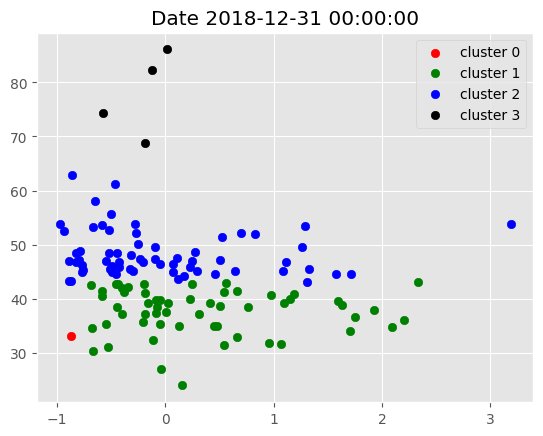

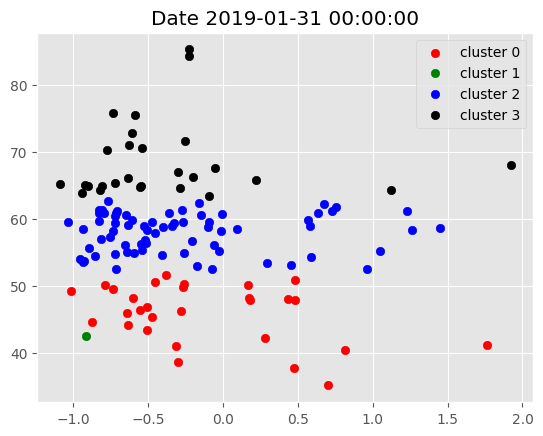

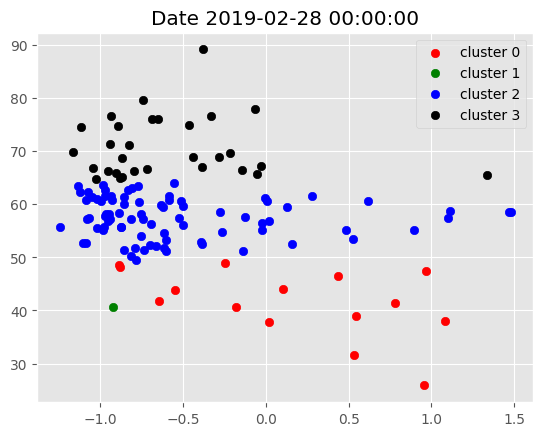

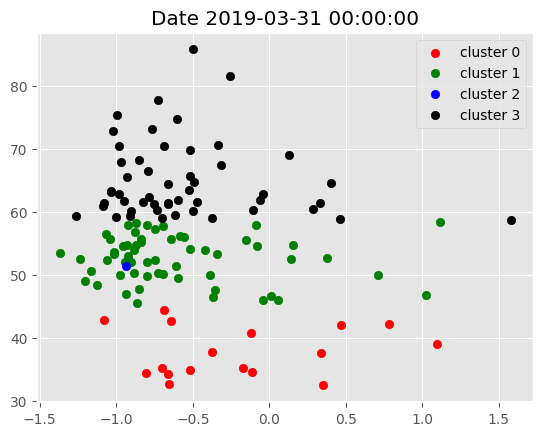

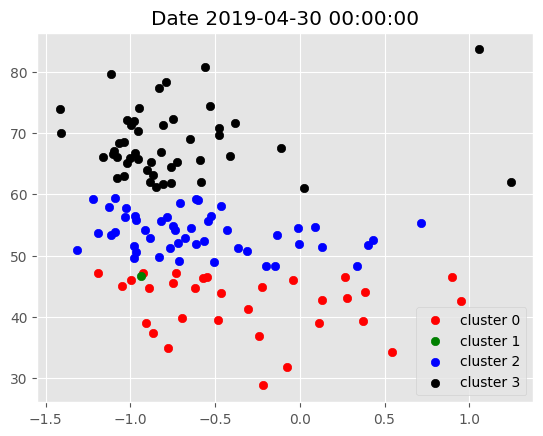

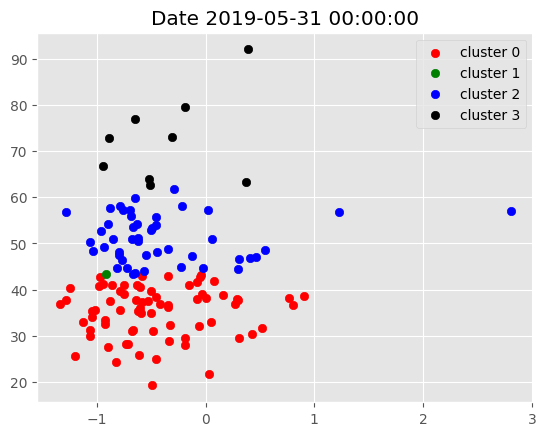

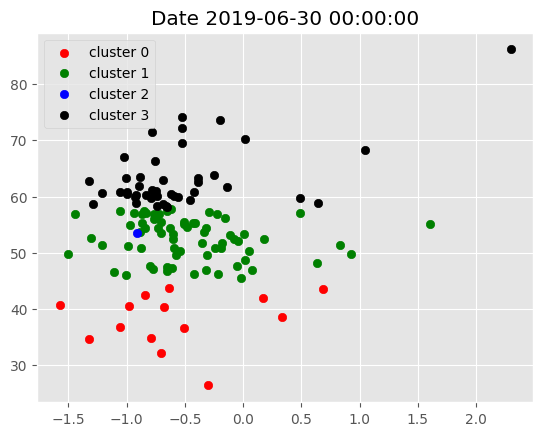

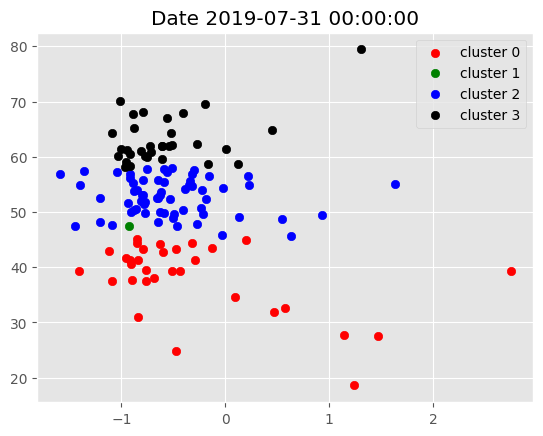

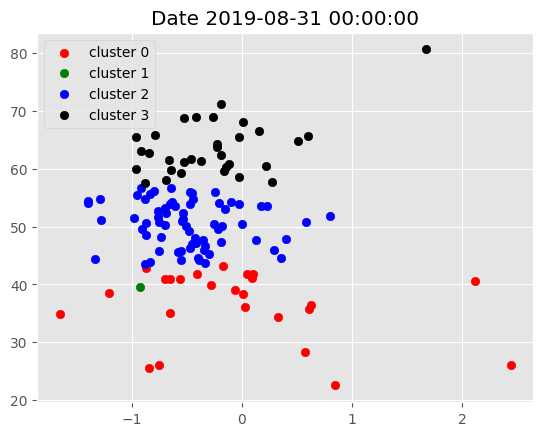

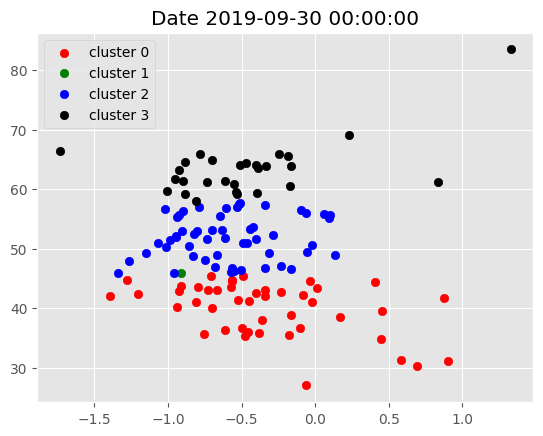

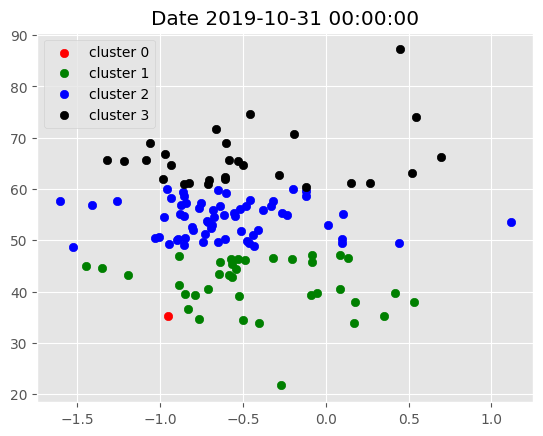

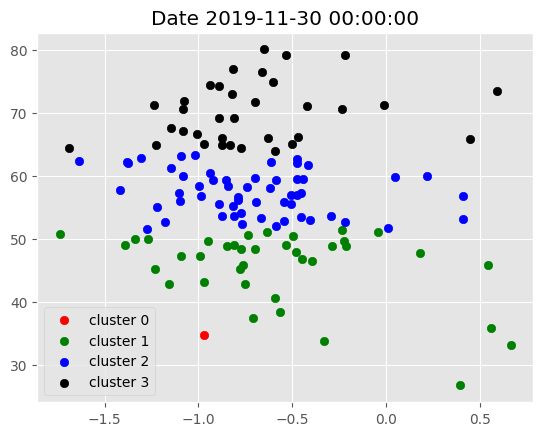

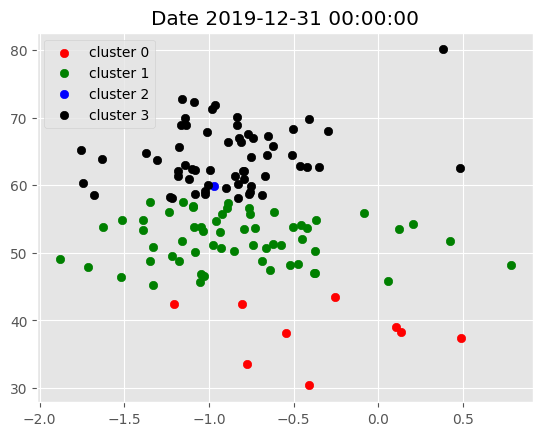

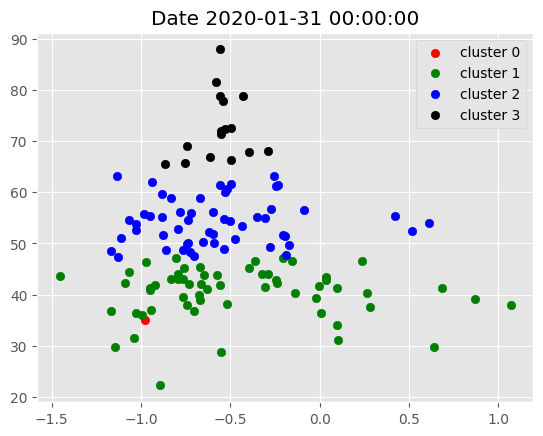

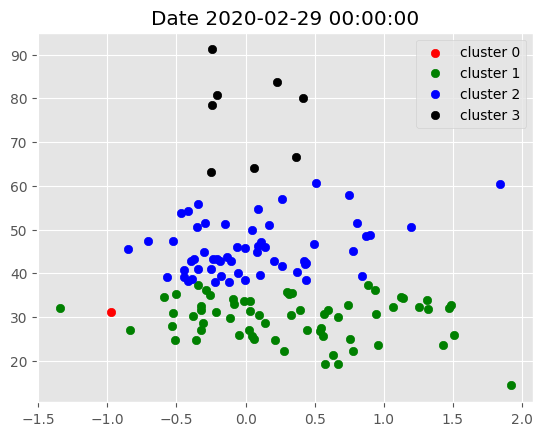

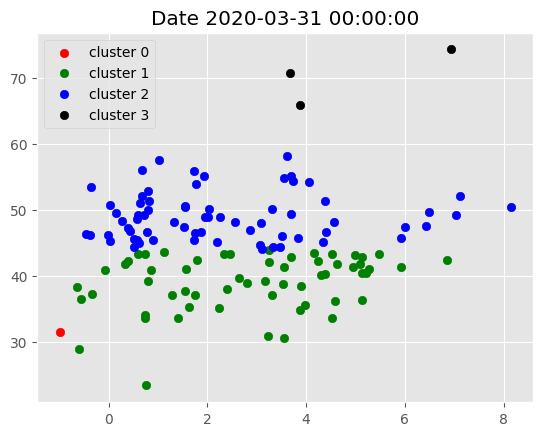

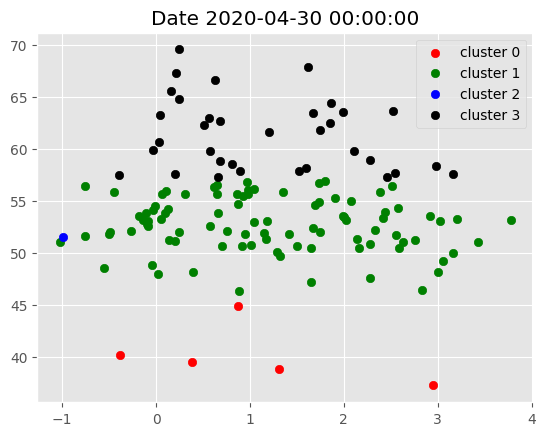

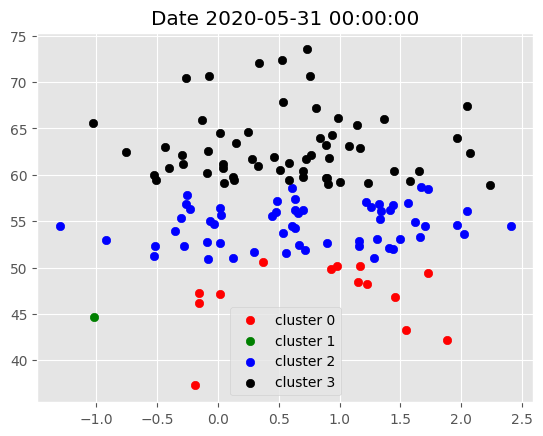

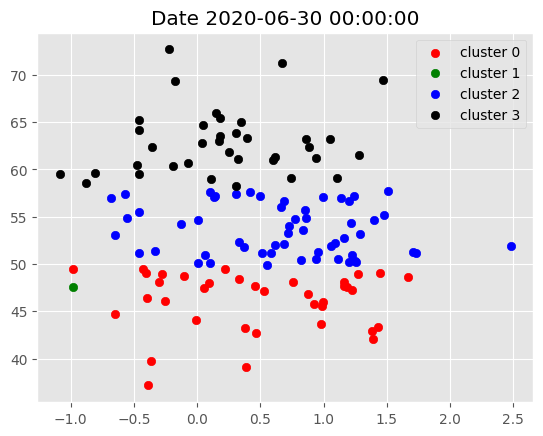

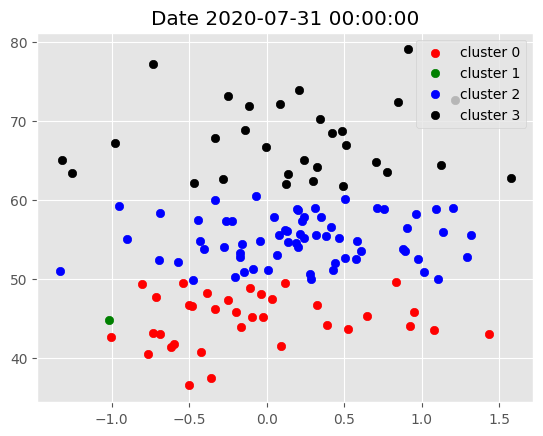

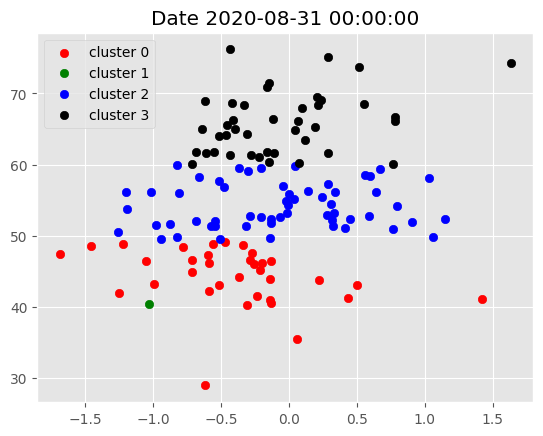

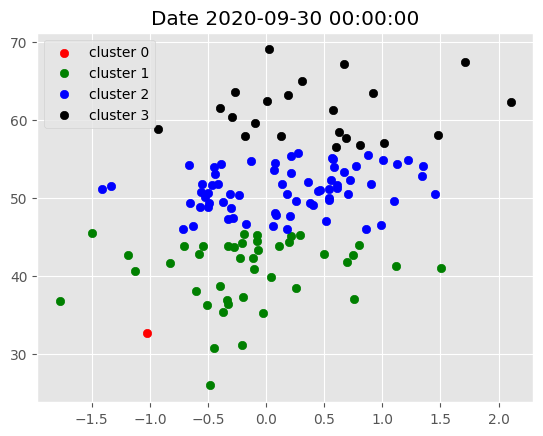

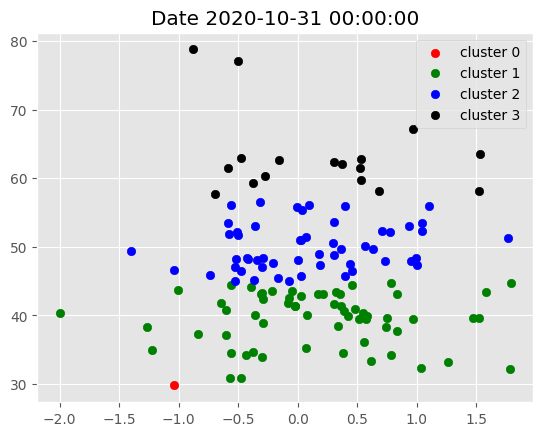

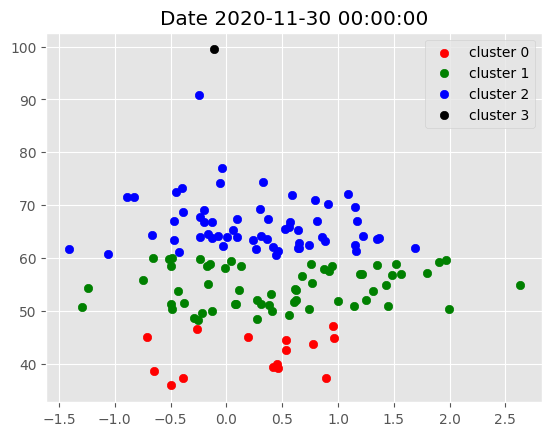

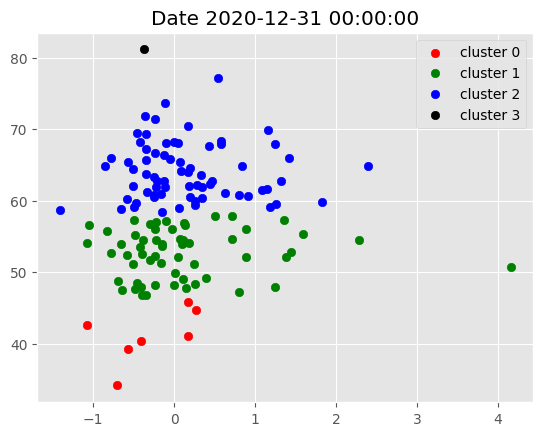

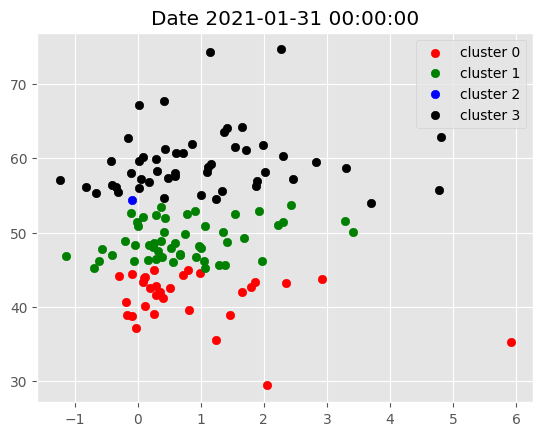

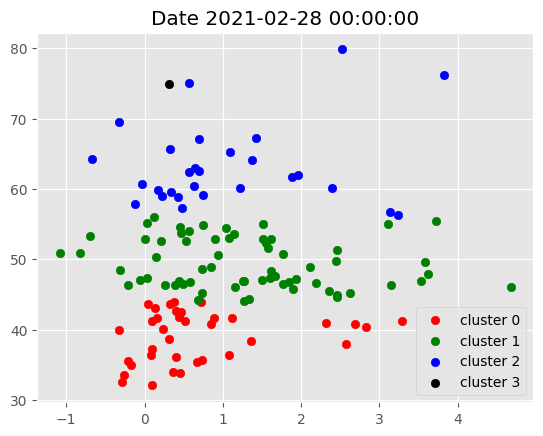

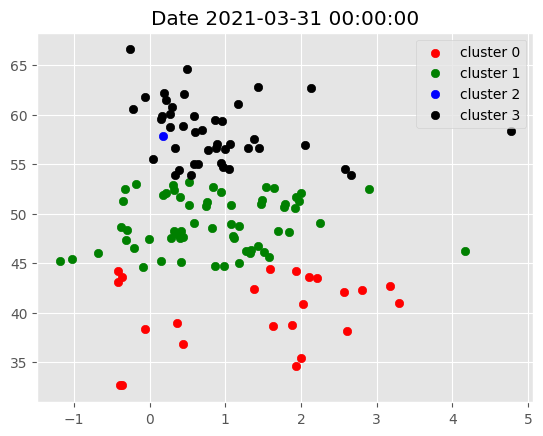

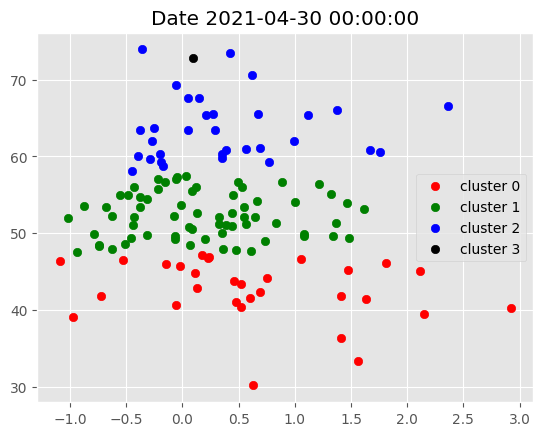

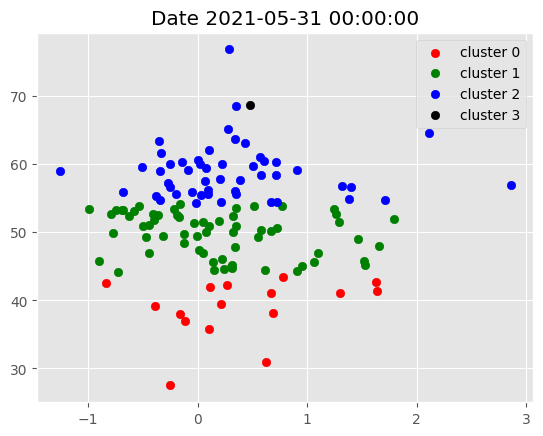

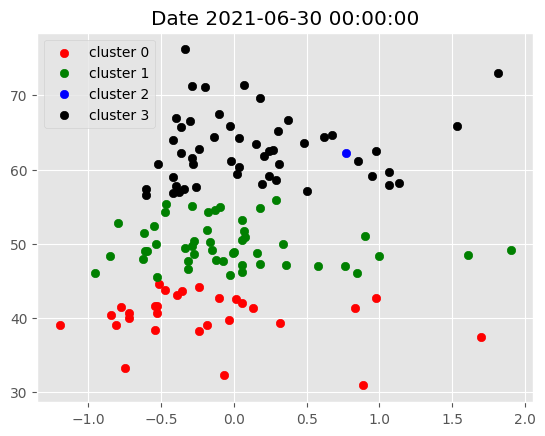

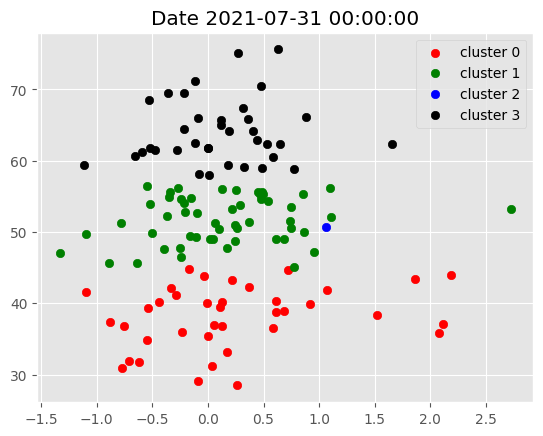

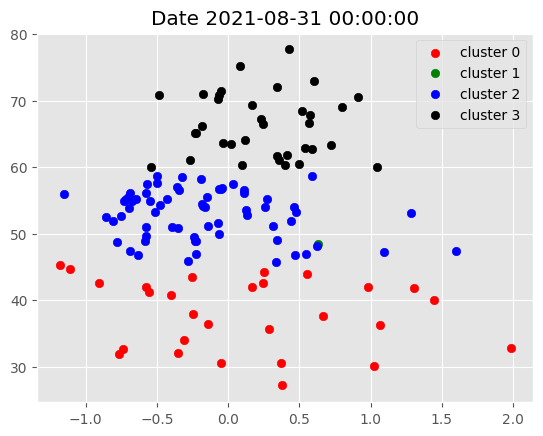

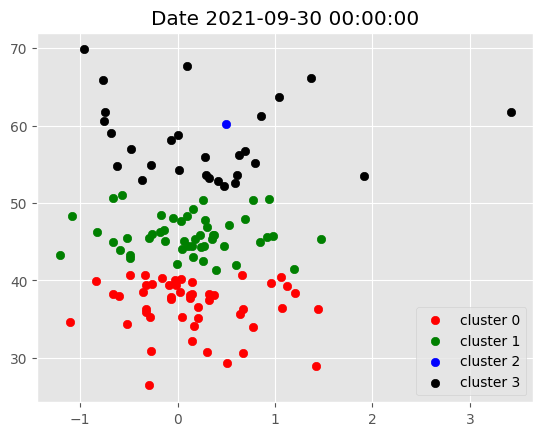

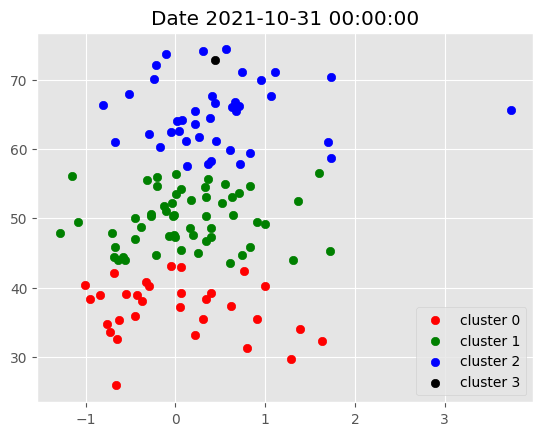

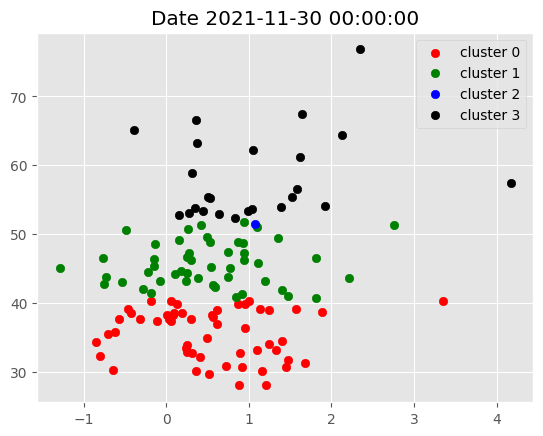

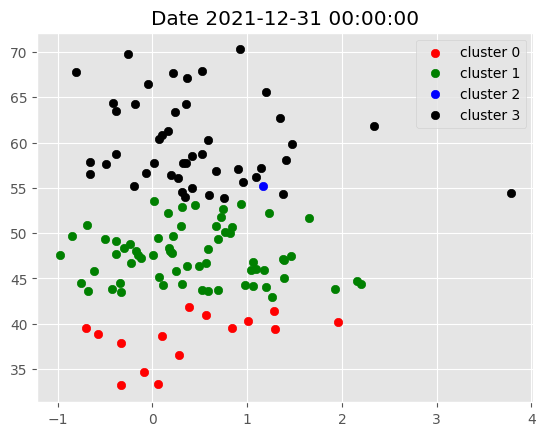

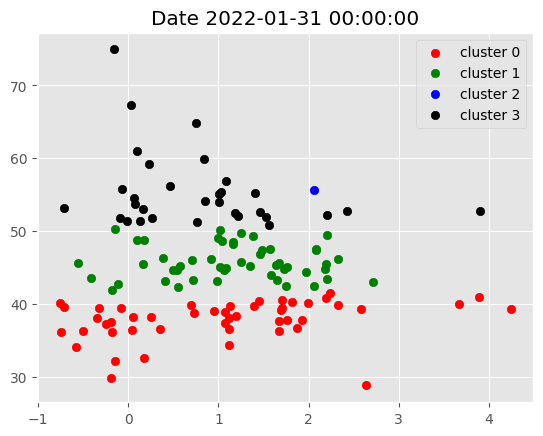

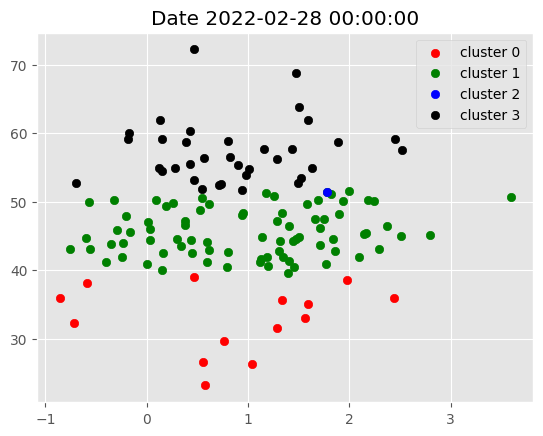

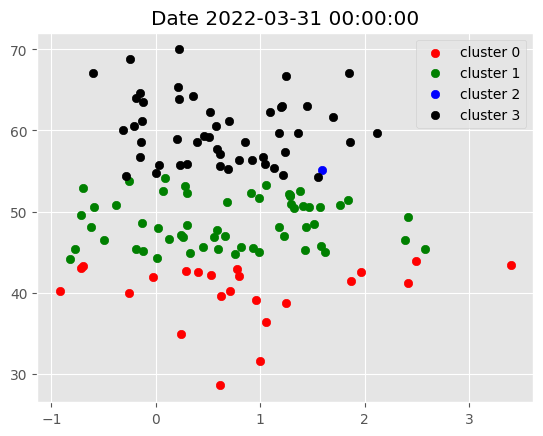

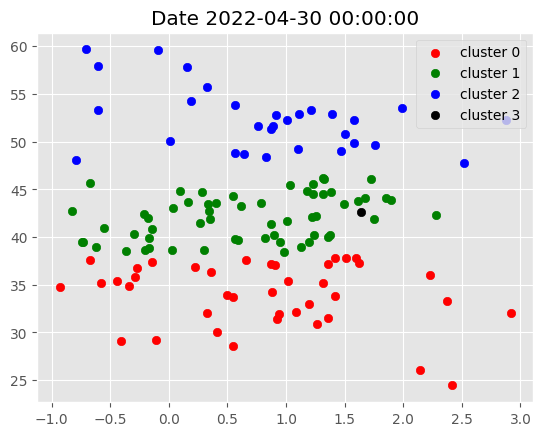

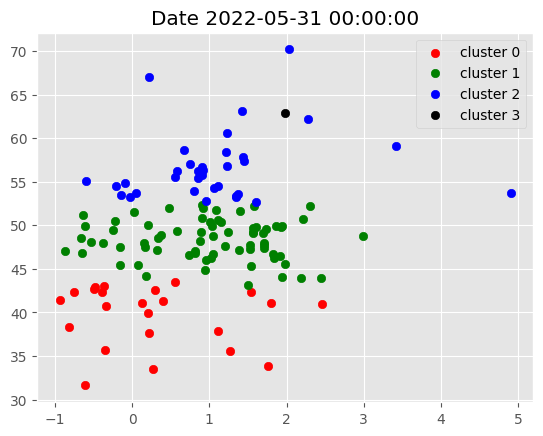

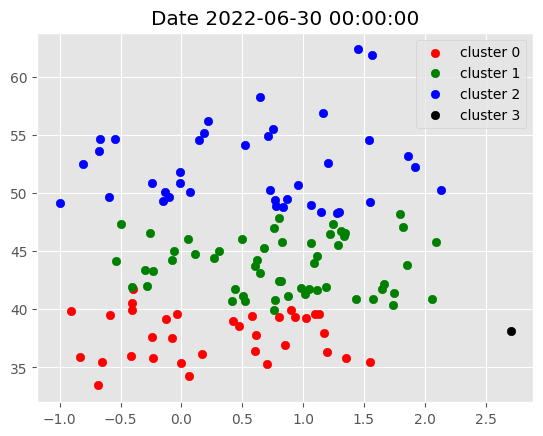

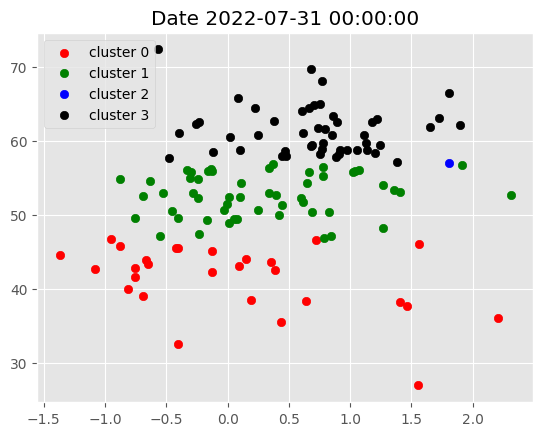

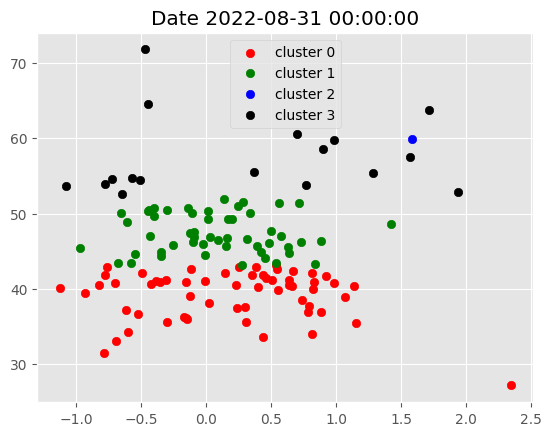

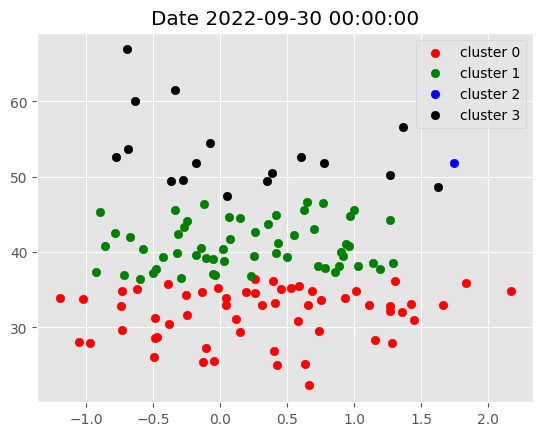

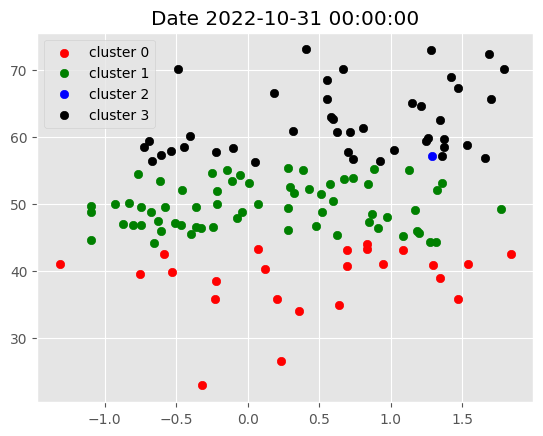

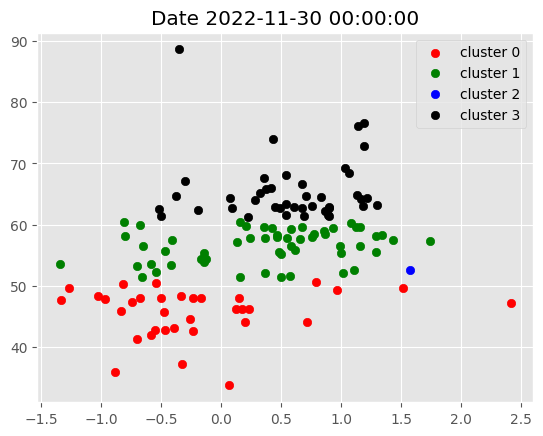

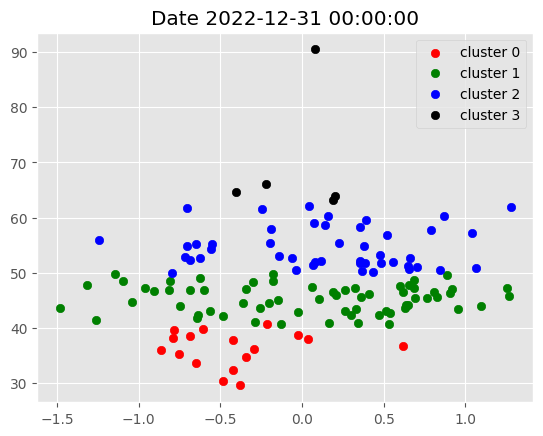

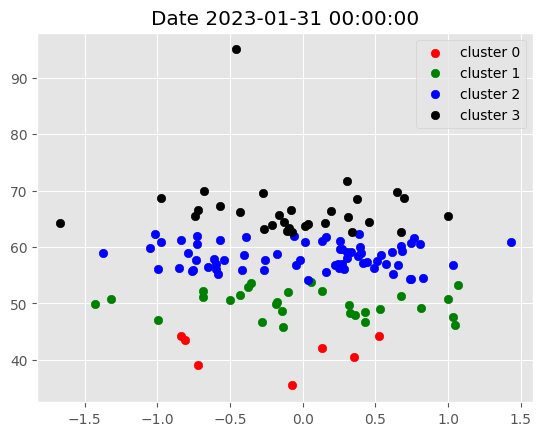

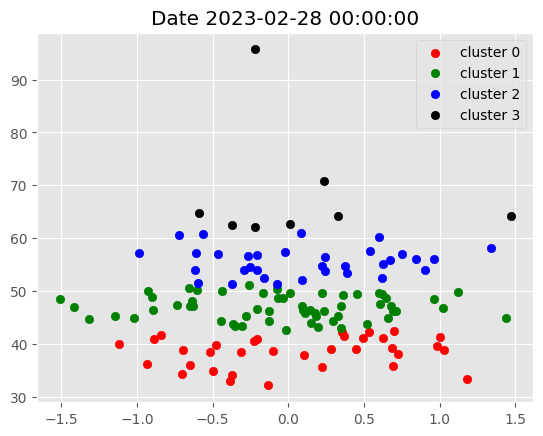

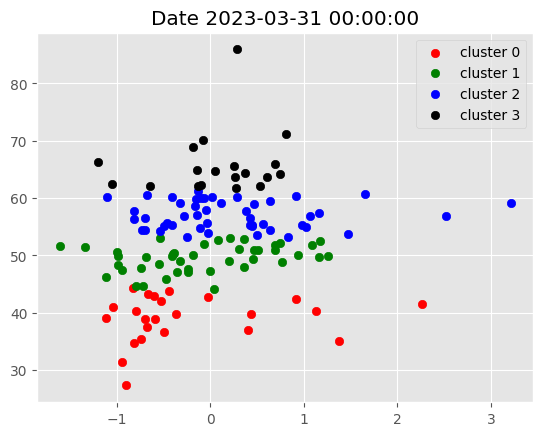

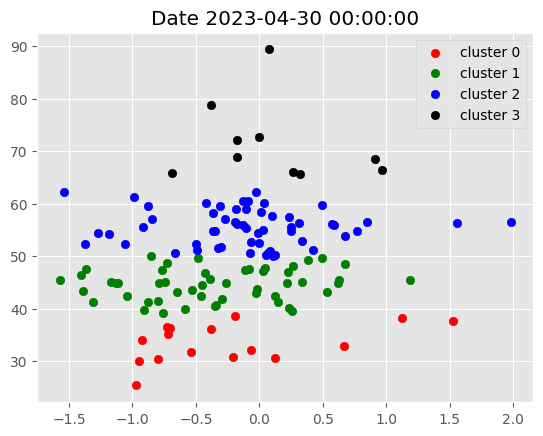

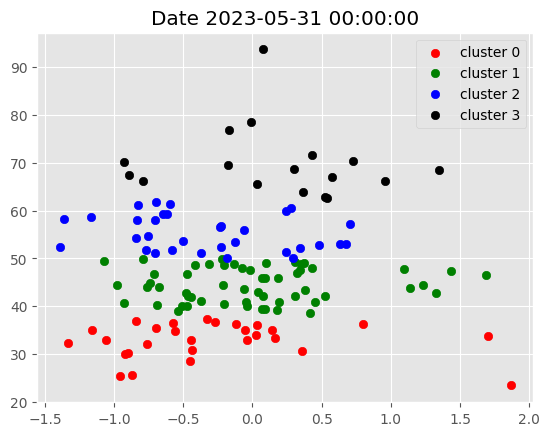

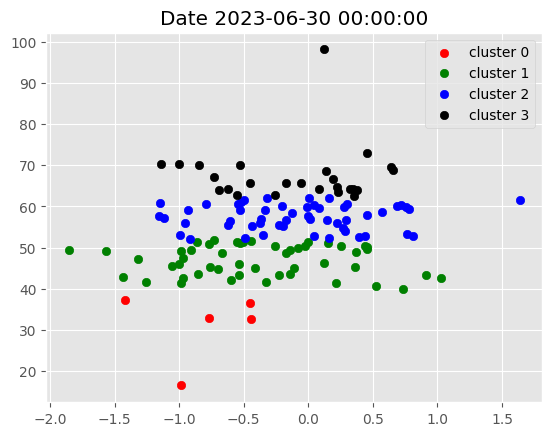

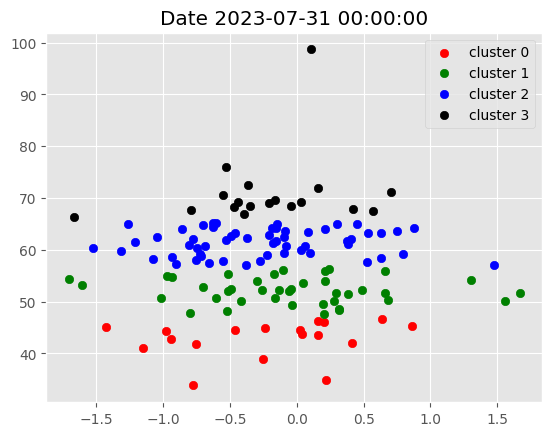

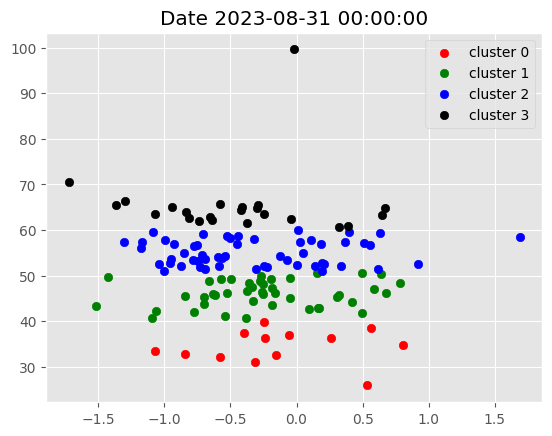

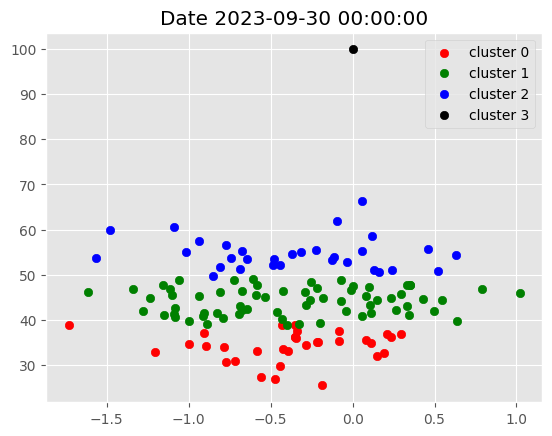

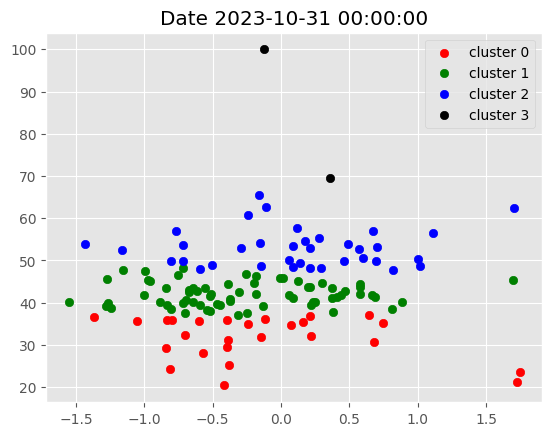

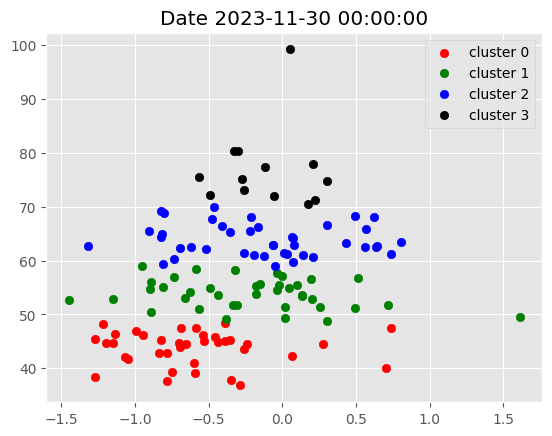

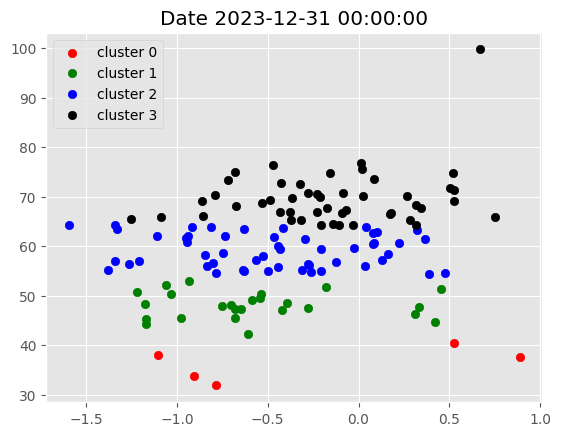

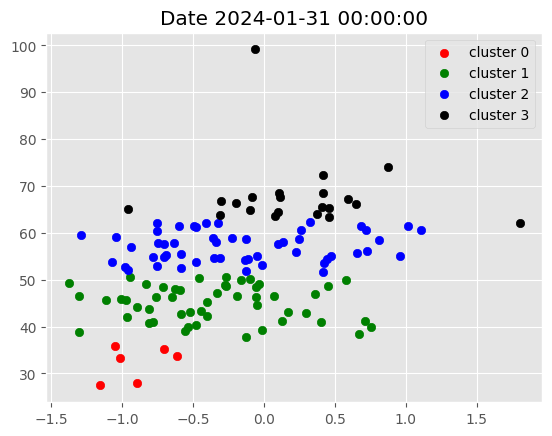

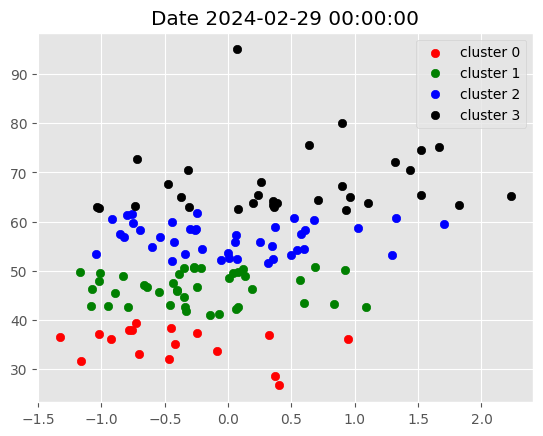

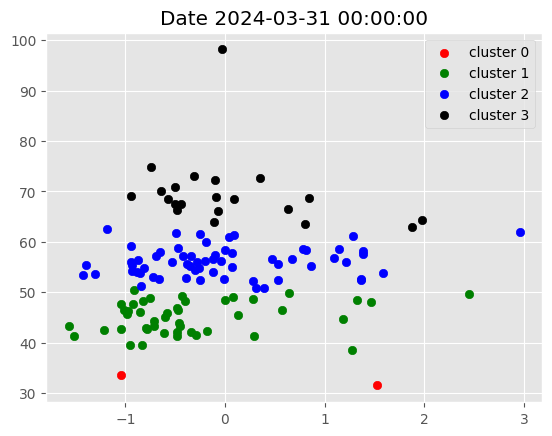

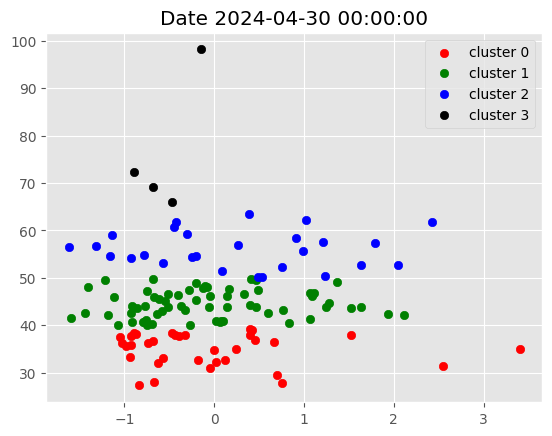

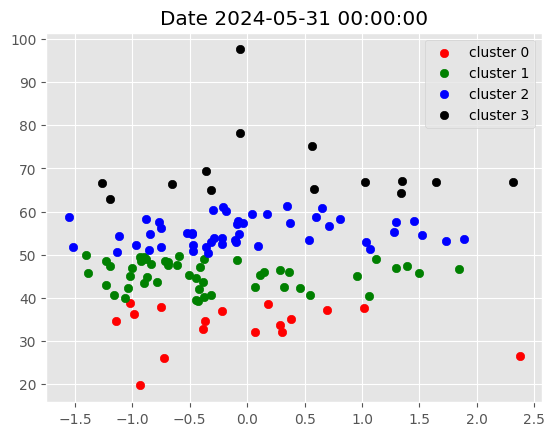

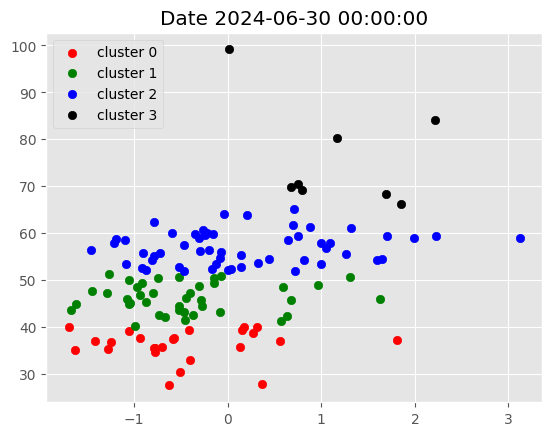

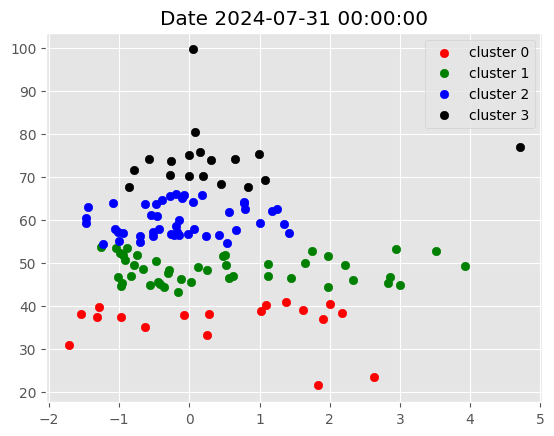

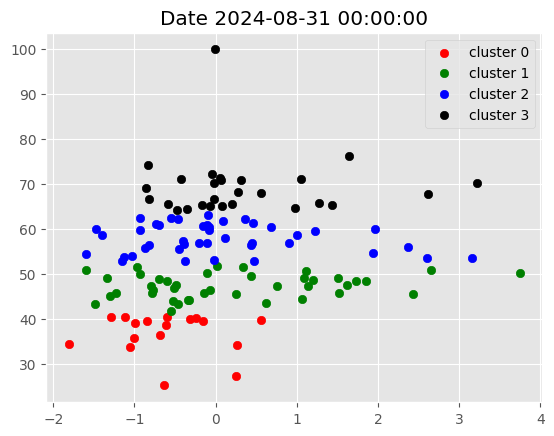

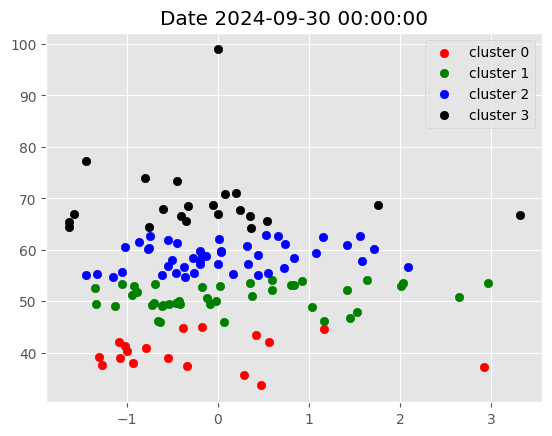

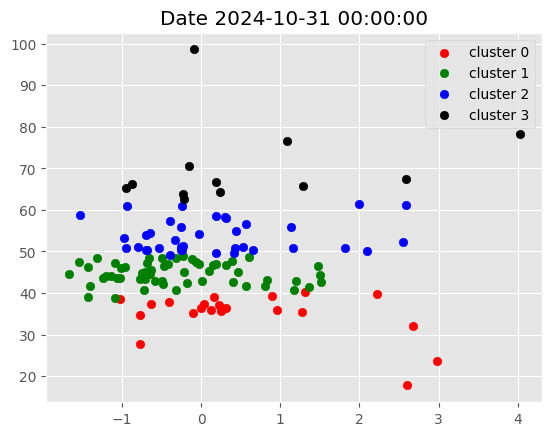

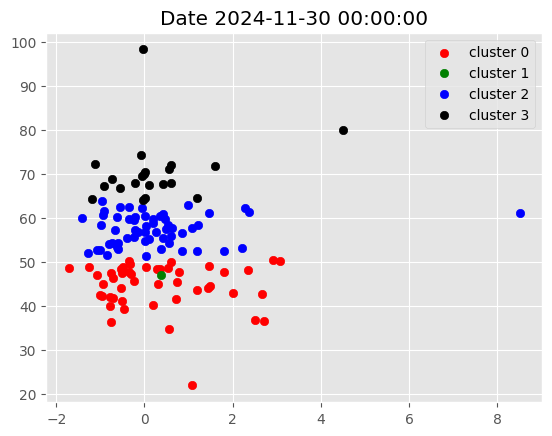

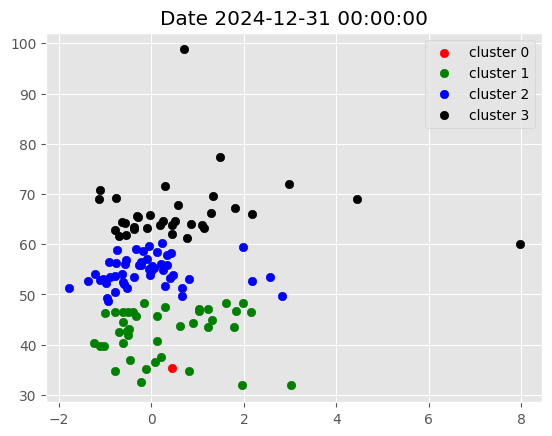

In [18]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():
    
    g = data.xs(i, level=0)
    
    plt.title(f'Date {i}')
    
    plot_clusters(g)

## 7. For each month select assets based on the cluster and form a portfolio based on Efficient Frontier max sharpe ratio optimization

* First we will filter only stocks corresponding to the cluster we choose based on our hypothesis.

* Momentum is persistent and my idea would be that stocks clustered around RSI 70 centroid should continue to outperform in the following month - thus I would select stocks corresponding to cluster 3.


In [19]:
filtered_df = data[data['cluster']==3].copy()

filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index+pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])

dates = filtered_df.index.get_level_values('date').unique().tolist()

fixed_dates = {}

for d in dates:
    
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()
    
fixed_dates

# convert fixed_dates to a pandas DataFrame
# Identify the last key in the dictionary
last_key = list(fixed_dates.keys())[-1]

# Extract the data associated with the last key
last_column_data = fixed_dates[last_key]

# Create a pandas DataFrame from the extracted data
watchlist = pd.DataFrame({last_key: last_column_data})
watchlist.columns.values[0] = 'Symbol'
watchlist['Exchange'] = 'NASDAQ'
watchlist['Type'] = 'Stock'

watchlist.to_csv('watchlist.csv', index=False)


# Display the DataFrame
print(watchlist)



   Symbol Exchange   Type
0    ACWI   NASDAQ  Stock
1    ADBE   NASDAQ  Stock
2    AMBA   NASDAQ  Stock
3    AMZN   NASDAQ  Stock
4    ANGL   NASDAQ  Stock
5    CHTR   NASDAQ  Stock
6    CINF   NASDAQ  Stock
7    EXEL   NASDAQ  Stock
8    FFIV   NASDAQ  Stock
9    FIVN   NASDAQ  Stock
10    GEN   NASDAQ  Stock
11   IGSB   NASDAQ  Stock
12   IUSB   NASDAQ  Stock
13   KBWB   NASDAQ  Stock
14   LULU   NASDAQ  Stock
15    MAR   NASDAQ  Stock
16   META   NASDAQ  Stock
17   MRVL   NASDAQ  Stock
18   MSFT   NASDAQ  Stock
19   MSTR   NASDAQ  Stock
20    NWL   NASDAQ  Stock
21   ROST   NASDAQ  Stock
22    SFM   NASDAQ  Stock
23    SHV   NASDAQ  Stock
24   TMUS   NASDAQ  Stock
25   TROW   NASDAQ  Stock
26   ULTA   NASDAQ  Stock
27   VGSH   NASDAQ  Stock
28     YY   NASDAQ  Stock
29   ROKU   NASDAQ  Stock
30     GH   NASDAQ  Stock
31   TWST   NASDAQ  Stock
32     ZM   NASDAQ  Stock
33   CRWD   NASDAQ  Stock


In [20]:
# Step 1: Extract the last entry
# Get the last key based on maximum date
last_date = max(fixed_dates.keys())
last_date_stocks = fixed_dates[last_date]

# Step 2: Copy the values to a list (already in list form, directly use it)
stocks_to_save = last_date_stocks

# Step 3: Save the list to a CSV file
csv_filename = 'stocks_list.csv'
with open(csv_filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Stocks'])  # Writing a header, optional
    for stock in stocks_to_save:
        writer.writerow([stock])  # Each stock in its own row

print(f"Data from the last date {last_date} has been saved to {csv_filename}.")


Data from the last date 2025-01-01 has been saved to stocks_list.csv.


### Define portfolio optimization function

* We will define a function which optimizes portfolio weights using PyPortfolioOpt package and EfficientFrontier optimizer to maximize the sharpe ratio.

* To optimize the weights of a given portfolio we would need to supply last 1 year prices to the function.

* Apply signle stock weight bounds constraint for diversification (minimum half of equaly weight and maximum 10% of portfolio).

In [21]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def optimize_weights(prices, lower_bound=0):
    
    returns = expected_returns.mean_historical_return(prices=prices,
                                                      frequency=252)
    
    cov = risk_models.sample_cov(prices=prices,
                                 frequency=252)
    
    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound, .1),
                           solver='SCS')
    
    weights = ef.max_sharpe()
    
    return ef.clean_weights()


* Download Fresh Daily Prices Data only for short listed stocks.

In [22]:
stocks = data.index.get_level_values('ticker').unique().tolist()

new_df = yf.download(tickers=stocks,
                     start=data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12),
                     end=data.index.get_level_values('date').unique()[-1])

new_df

[*********************100%***********************]  156 of 158 completed

158 Failed downloads:
[*********************100%***********************]  156 of 158 completed['CLOV', 'PAYX', 'MMSI', 'HAIN', 'BLUE', 'PZZA', 'EXEL', 'IUSB', 'POOL', 'TLRY', 'HCSG', 'CINF', 'WKHS', 'WERN', 'AMBA', 'REGN', 'ULTA', 'PPC', 'ADBE', 'IGSB', 'PFG', 'CPB', 'CCEP', 'ROST', 'TTMI', 'CRWD', 'LSCC', 'ALNY', 'LBTYK', 'JAZZ', 'IJT', 'ASML', 'XNET', 'WW', 'KLAC', 'SHV', 'REAL', 'ACWI', 'GDS', 'ZM', 'BAND', 'MTCH', 'SBAC', 'MLCO', 'FIVN', 'MELI', 'CENX', 'IUSV', 'SKYY', 'BPMC', 'AMGN', 'GEN', 'CHTR', 'WYNN', 'VGSH', 'AEP', 'LOGI', 'LFUS', 'DXCM', 'PDCO', 'XEL', 'DLTR', 'CHRD', 'AMD', 'MAR', 'CRTO', 'BLMN', 'UTHR', 'TMUS', 'DVY', 'TWST', 'KBWB', 'LBRDK', 'AMAT', 'CTSH', 'SQQQ', 'VRTX', 'FFIV', 'NNDM', 'NVDA', 'AMZN', 'VRNS', 'LULU', 'BSY', 'META', 'VC', 'MSTR', 'MVIS', 'ACIW', 'TENB', 'CRNC', 'SNDL', 'INMD', 'WING', 'LCID', 'CSIQ', 'ADI', 'CYBR', 'DOX', 'ENTG', 'LSTR', 'HOLX', 'RRR', 'PBYI', 'GEVO', 'SUPN', 'HS

Empty DataFrame
Columns: [(Adj Close, ACB), (Adj Close, ACGL), (Adj Close, ACIW), (Adj Close, ACWI), (Adj Close, ADBE), (Adj Close, ADI), (Adj Close, AEP), (Adj Close, ALNY), (Adj Close, AMAT), (Adj Close, AMBA), (Adj Close, AMD), (Adj Close, AMGN), (Adj Close, AMZN), (Adj Close, ANGL), (Adj Close, ASML), (Adj Close, AVAV), (Adj Close, BAND), (Adj Close, BLMN), (Adj Close, BLUE), (Adj Close, BND), (Adj Close, BPMC), (Adj Close, BSY), (Adj Close, CAR), (Adj Close, CARA), (Adj Close, CCEP), (Adj Close, CENX), (Adj Close, CGC), (Adj Close, CHRD), (Adj Close, CHTR), (Adj Close, CINF), (Adj Close, CLOV), (Adj Close, CPB), (Adj Close, CRNC), (Adj Close, CRTO), (Adj Close, CRWD), (Adj Close, CSIQ), (Adj Close, CTSH), (Adj Close, CYBR), (Adj Close, DLTR), (Adj Close, DOX), (Adj Close, DVY), (Adj Close, DXCM), (Adj Close, ENTG), (Adj Close, EXEL), (Adj Close, FCEL), (Adj Close, FFIV), (Adj Close, FIVN), (Adj Close, FOXF), (Adj Close, FROG), (Adj Close, GDS), (Adj Close, GEN), (Adj Close, GEVO), (Adj Close, GH), (Adj Close, GRPN), (Adj Close, HAIN), (Adj Close, HALO), (Adj Close, HCSG), (Adj Close, HOLX), (Adj Close, HSIC), (Adj Close, HTHT), (Adj Close, IGSB), (Adj Close, IJT), (Adj Close, INMD), (Adj Close, IRTC), (Adj Close, IRWD), (Adj Close, IUSB), (Adj Close, IUSV), (Adj Close, JAZZ), (Adj Close, KBWB), (Adj Close, KLAC), (Adj Close, LBRDK), (Adj Close, LBTYK), (Adj Close, LCID), (Adj Close, LECO), (Adj Close, LFUS), (Adj Close, LOGI), (Adj Close, LSCC), (Adj Close, LSTR), (Adj Close, LULU), (Adj Close, MAR), (Adj Close, MELI), (Adj Close, META), (Adj Close, MLCO), (Adj Close, MMSI), (Adj Close, MRVL), (Adj Close, MSFT), (Adj Close, MSTR), (Adj Close, MTCH), (Adj Close, MVIS), (Adj Close, NCNO), (Adj Close, NNDM), (Adj Close, NVDA), (Adj Close, NWL), (Adj Close, PAYX), (Adj Close, PBYI), (Adj Close, PCTY), (Adj Close, PDCO), (Adj Close, PEGA), (Adj Close, PENN), (Adj Close, PEP), ...]
Index: []

[0 rows x 948 columns]

* Calculate daily returns for each stock which could land up in our portfolio.

* Then loop over each month start, select the stocks for the month and calculate their weights for the next month.

* If the maximum sharpe ratio optimization fails for a given month, apply equally-weighted weights.

* Calculated each day portfolio return.

In [23]:
returns_dataframe = np.log(new_df['Adj Close']).diff()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    
    try:

        end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')

        cols = fixed_dates[start_date]

        optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')

        optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')
        
        optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]
        
        success = False
        try:
            weights = optimize_weights(prices=optimization_df,
                                   lower_bound=round(1/(len(optimization_df.columns)*2),3))

            weights = pd.DataFrame(weights, index=pd.Series(0))
            
            success = True
        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')
        
        if success==False:
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                     index=optimization_df.columns.tolist(),
                                     columns=pd.Series(0)).T
        
        temp_df = returns_dataframe[start_date:end_date]

        temp_df = temp_df.stack().to_frame('return').reset_index(level=0)\
                   .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
                          left_index=True,
                          right_index=True)\
                   .reset_index().set_index(['Date', 'index']).unstack().stack()

        temp_df.index.names = ['date', 'ticker']

        temp_df['weighted_return'] = temp_df['return']*temp_df['weight']

        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')

        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
    
    except Exception as e:
        print(e)

portfolio_df = portfolio_df.drop_duplicates()

portfolio_df

Max Sharpe Optimization failed for 2019-01-01, Continuing with Equal-Weights
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2019-02-01, Continuing with Equal-Weights
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2019-03-01, Continuing with Equal-Weights
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2019-04-01, Continuing with Equal-Weights
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2019-05-01, Continuing with Equal-Weights
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2019-06-01, Continuing with Equal-Weights
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2019-07-01, Continuing with Equal-Weights
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2019-08-01, Continuing with Equal-Weights
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2019-09-01, Continuing with Equal-Wei

""


## 8. Visualize Portfolio returns and compare to SP500 returns.

In [24]:
spy = yf.download(tickers='SPY',
                  start='2015-01-01',
                  end=dt.date.today())

spy_ret = np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close':'SPY Buy&Hold'}, axis=1)

portfolio_df = portfolio_df.merge(spy_ret,
                                  left_index=True,
                                  right_index=True)

portfolio_df

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SPY']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


Price,SPY Buy&Hold
Ticker,SPY
Date,


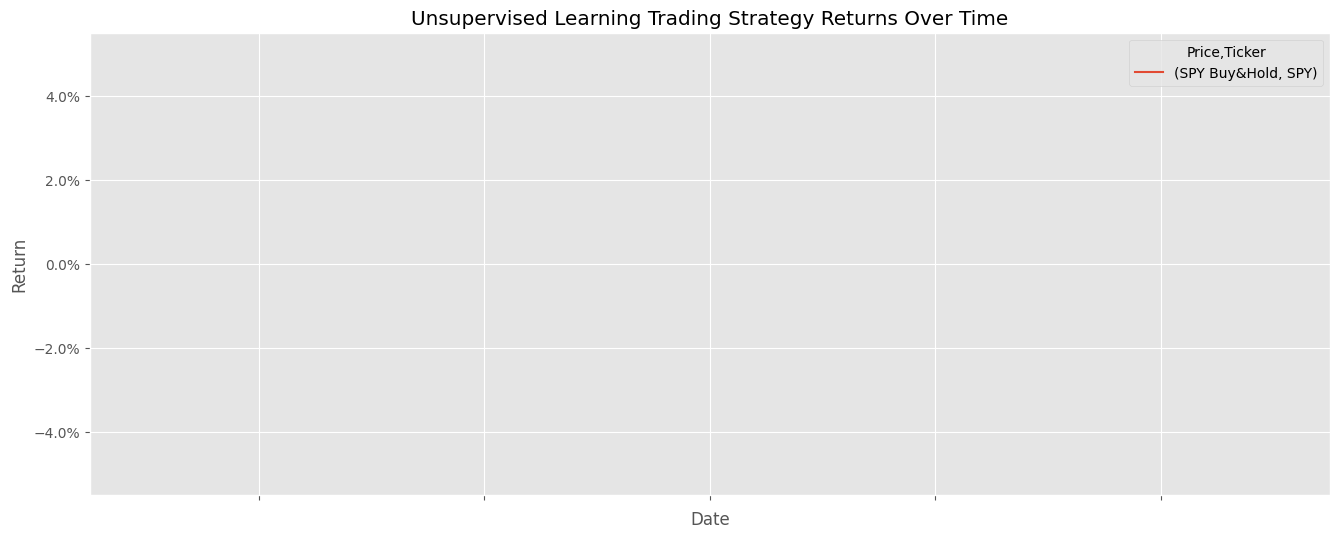

In [25]:
import matplotlib.ticker as mtick

plt.style.use('ggplot')

portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1

portfolio_cumulative_return[:'2023-09-29'].plot(figsize=(16,6))

plt.title('Unsupervised Learning Trading Strategy Returns Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()


# Twitter Sentiment Investing Strategy

## 1. Load Twitter Sentiment Data

* Load the twitter sentiment dataset, set the index, calculat engagement ratio and filter out stocks with no significant twitter activity.

In [26]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import datetime as dt
# import yfinance as yf
# import os
# plt.style.use('ggplot')

# data_folder = 'C:/Users/user/Desktop/Python Scripts'

# sentiment_df = pd.read_csv(os.path.join(data_folder, 'sentiment_data.csv'))

# sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# sentiment_df = sentiment_df.set_index(['date', 'symbol'])

# sentiment_df['engagement_ratio'] = sentiment_df['twitterComments']/sentiment_df['twitterLikes']

# sentiment_df = sentiment_df[(sentiment_df['twitterLikes']>20)&(sentiment_df['twitterComments']>10)]

# sentiment_df

## 2. Aggregate Monthly and calculate average sentiment for the month

* Aggregate on a monthly level and calculate average monthly metric, for the one we choose.

In [27]:
# aggragated_df = (sentiment_df.reset_index('symbol').groupby([pd.Grouper(freq='M'), 'symbol'])
#                     [['engagement_ratio']].mean())

# aggragated_df['rank'] = (aggragated_df.groupby(level=0)['engagement_ratio']
#                          .transform(lambda x: x.rank(ascending=False)))

# aggragated_df

## 3. Select Top 5 Stocks based on their cross-sectional ranking for each month

* Select top 5 stocks by rank for each month and fix the date to start at beginning of next month.

In [28]:
# filtered_df = aggragated_df[aggragated_df['rank']<6].copy()

# filtered_df = filtered_df.reset_index(level=1)

# filtered_df.index = filtered_df.index+pd.DateOffset(1)

# filtered_df = filtered_df.reset_index().set_index(['date', 'symbol'])

# filtered_df.head(20)

## 4. Extract the stocks to form portfolios with at the start of each new month

* Create a dictionary containing start of month and corresponded selected stocks.

In [29]:
# dates = filtered_df.index.get_level_values('date').unique().tolist()

# fixed_dates = {}

# for d in dates:
    
#     fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()
    
# fixed_dates

## 5. Download fresh stock prices for only selected/shortlisted stocks

In [30]:
# stocks_list = sentiment_df.index.get_level_values('symbol').unique().tolist()

# prices_df = yf.download(tickers=stocks_list,
#                         start='2021-01-01',
#                         end='2023-03-01')

## 6. Calculate Portfolio Returns with monthly rebalancing


In [31]:
# returns_df = np.log(prices_df['Adj Close']).diff().dropna()

# portfolio_df = pd.DataFrame()

# for start_date in fixed_dates.keys():
    
#     end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd()).strftime('%Y-%m-%d')
    
#     cols = fixed_dates[start_date]
    
#     temp_df = returns_df[start_date:end_date][cols].mean(axis=1).to_frame('portfolio_return')
    
#     portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
    
# portfolio_df

## 7. Download NASDAQ/QQQ prices and calculate returns to compare to our strategy

In [32]:
# qqq_df = yf.download(tickers='QQQ',
#                      start='2021-01-01',
#                      end='2023-03-01')

# qqq_ret = np.log(qqq_df['Adj Close']).diff().to_frame('nasdaq_return')

# portfolio_df = portfolio_df.merge(qqq_ret,
#                                   left_index=True,
#                                   right_index=True)

# portfolio_df

In [33]:
# portfolios_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum()).sub(1)

# portfolios_cumulative_return.plot(figsize=(16,6))

# plt.title('Twitter Engagement Ratio Strategy Return Over Time')

# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

# plt.ylabel('Return')

# plt.show()

# Intraday Strategy Using GARCH Model


* Using simulated daily data and intraday 5-min data.
* Load Daily and 5-minute data.
* Define function to fit GARCH model on the daily data and predict 1-day ahead volatility in a rolling window.
* Calculate prediction premium and form a daily signal from it.
* Merge with intraday data and calculate intraday indicators to form the intraday signal.
* Generate the position entry and hold until the end of the day.
* Calculate final strategy returns.

## 1. Load Simulated Daily and Simulated 5-minute data.

* We are loading both datasets, set the indexes and calculate daily log returns.

In [34]:
# import matplotlib.pyplot as plt
# from arch import arch_model
# import pandas_ta
# import pandas as pd
# import numpy as np
# import os

# data_folder = 'C:/Users/user/Desktop/Python Scripts'

# daily_df = pd.read_csv(os.path.join(data_folder, 'simulated_daily_data.csv'))

# daily_df = daily_df.drop('Unnamed: 7', axis=1)

# daily_df['Date'] = pd.to_datetime(daily_df['Date'])

# daily_df = daily_df.set_index('Date')


# intraday_5min_df = pd.read_csv(os.path.join(data_folder, 'simulated_5min_data.csv'))

# intraday_5min_df = intraday_5min_df.drop('Unnamed: 6', axis=1)

# intraday_5min_df['datetime'] = pd.to_datetime(intraday_5min_df['datetime'])

# intraday_5min_df = intraday_5min_df.set_index('datetime')

# intraday_5min_df['date'] = pd.to_datetime(intraday_5min_df.index.date)

# intraday_5min_df

## 2. Define function to fit GARCH model and predict 1-day ahead volatility in a rolling window.

* We are first calculating the 6-month rolling variance and then we are creating a function in a 6-month rolling window to fit a garch model and predict the next day variance.

In [35]:
# daily_df['log_ret'] = np.log(daily_df['Adj Close']).diff()

# daily_df['variance'] = daily_df['log_ret'].rolling(180).var()

# daily_df = daily_df['2020':]

# def predict_volatility(x):
    
#     best_model = arch_model(y=x,
#                             p=1,
#                             q=3).fit(update_freq=5,
#                                      disp='off')
    
#     variance_forecast = best_model.forecast(horizon=1).variance.iloc[-1,0]

#     print(x.index[-1])
    
#     return variance_forecast

# daily_df['predictions'] = daily_df['log_ret'].rolling(180).apply(lambda x: predict_volatility(x))

# daily_df = daily_df.dropna()

# daily_df

## 3. Calculate prediction premium and form a daily signal from it.

* We are calculating the prediction premium. And calculate its 6-month rolling standard deviation.

* From this we are creating our daily signal.

In [36]:
# daily_df['prediction_premium'] = (daily_df['predictions']-daily_df['variance'])/daily_df['variance']

# daily_df['premium_std'] = daily_df['prediction_premium'].rolling(180).std()

# daily_df['signal_daily'] = daily_df.apply(lambda x: 1 if (x['prediction_premium']>x['premium_std'])
#                                          else (-1 if (x['prediction_premium']<x['premium_std']*-1) else np.nan),
#                                          axis=1)

# daily_df['signal_daily'] = daily_df['signal_daily'].shift()

# daily_df

In [37]:
# plt.style.use('ggplot')

# daily_df['signal_daily'].plot(kind='hist')

# plt.show()

## 4. Merge with intraday data and calculate intraday indicators to form the intraday signal.

* Calculate all intraday indicators and intraday signal.

In [38]:
# final_df = intraday_5min_df.reset_index()\
#                             .merge(daily_df[['signal_daily']].reset_index(),
#                                    left_on='date',
#                                    right_on='Date')\
#                             .drop(['date','Date'], axis=1)\
#                             .set_index('datetime')

# final_df['rsi'] = pandas_ta.rsi(close=final_df['close'],
#                                 length=20)

# final_df['lband'] = pandas_ta.bbands(close=final_df['close'],
#                                      length=20).iloc[:,0]

# final_df['uband'] = pandas_ta.bbands(close=final_df['close'],
#                                      length=20).iloc[:,2]

# final_df['signal_intraday'] = final_df.apply(lambda x: 1 if (x['rsi']>70)&
#                                                             (x['close']>x['uband'])
#                                              else (-1 if (x['rsi']<30)&
#                                                          (x['close']<x['lband']) else np.nan),
#                                              axis=1)

# final_df['return'] = np.log(final_df['close']).diff()

# final_df

## 5. Generate the position entry and hold until the end of the day.

In [39]:
# final_df['return_sign'] = final_df.apply(lambda x: -1 if (x['signal_daily']==1)&(x['signal_intraday']==1)
#                                         else (1 if (x['signal_daily']==-1)&(x['signal_intraday']==-1) else np.nan),
#                                         axis=1)

# final_df['return_sign'] = final_df.groupby(pd.Grouper(freq='D'))['return_sign']\
#                                   .transform(lambda x: x.ffill())

# final_df['forward_return'] = final_df['return'].shift(-1)

# final_df['strategy_return'] = final_df['forward_return']*final_df['return_sign']

# daily_return_df = final_df.groupby(pd.Grouper(freq='D'))['strategy_return'].sum()

## 6. Calculate final strategy returns.

In [40]:
# import matplotlib.ticker as mtick

# strategy_cumulative_return = np.exp(np.log1p(daily_return_df).cumsum()).sub(1)

# strategy_cumulative_return.plot(figsize=(16,6))

# plt.title('Intraday Strategy Returns')

# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

# plt.ylabel('Return')

# plt.show()
                                                                            